In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

# Assignment - Part I

## 3.1 Batch mode training using least squares - supervised learning of network weights


In [0]:
patterns=np.arange(0,2*np.pi,0.1)
N=len(patterns)

In [0]:
def f1(x):
  return np.sin(2*x)

In [0]:
def f2(x):
  if np.sin(2*x)>=0:
    return 1
  else:
    return -1

In [0]:
targets1=f1(patterns)

In [0]:
targets2=np.zeros(len(patterns))
for i in range(len(targets2)):
  targets2[i]=f2(patterns[i])

In [0]:
patterns_test=np.arange(0.5,2*np.pi,0.1)
N_test=len(patterns_test)

In [0]:
targets1_test=f1(patterns_test)

In [0]:
targets2_test=np.zeros(len(patterns_test))
for i in range(len(targets2_test)):
  targets2_test[i]=f2(patterns_test[i])

In [0]:
def gaussian(x,mu,sigma):
  argument=(-(x-mu)**2)/2*sigma**2
  return np.exp(argument)

In [0]:
number_RBF=5
eta=0.2
epochs=100

In [0]:
def parameters_uniform(number_RBF):
  sigma = 2*np.pi/number_RBF
  centers = [(i+0.5) * 2 * np.pi/number_RBF for i in range(number_RBF)]
  return(sigma, centers)

### Function 1: sin(2x)

In [0]:
def hidden_layer(x, centers, sigma, N_RBF):
  transfer_functions = [norm(loc = 0, scale = sigma) for i in range(N_RBF)]
  hout = np.array([[transfer_functions[i].pdf(np.linalg.norm(sample - centers[i])) for sample in x] for i in range(N_RBF)]).T
  return(hout)

# calculates the PHI matrix
def fitting_hidden_layer(trainin, centers, sigma, N_RBF):
  phi_matrix = hidden_layer(trainin,centers, sigma, N_RBF)
  return(phi_matrix)

In [0]:
def LMS(number_RBF,target,target_test,coeff):
  for i in range(number_RBF):
    sigma,mu=parameters_uniform(number_RBF)
    sigma=coeff*sigma
    phi[:,i]=gaussian(patterns,mu[i],sigma)
    phi_test[:,i]=gaussian(patterns_test,mu[i],sigma)

  LMS_weights=np.linalg.solve((phi.T).dot(phi),(phi.T).dot(target))
  output=phi_test.dot(LMS_weights)
  absolute_residual_error=np.mean(abs(target_test-output))
  return LMS_weights, absolute_residual_error

4  units are enough for a residual error less than 0.1
8  units are enough for a residual error less than 0.01
8  units are enough for a residual error less than 0.001


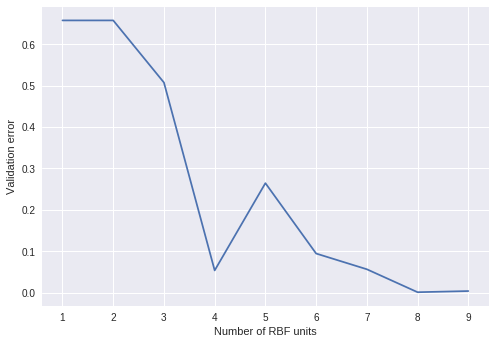

In [0]:
L=[]
check1,check2,check3=False,False,False
for number_RBF in range(1,10):
  phi=np.zeros((N,number_RBF))
  phi_test=np.zeros((N_test,number_RBF))
  LMS_weights, absolute_residual_error=LMS(number_RBF,targets1,targets1_test,1)
  if (absolute_residual_error<0.1 and check1==False):
    print(number_RBF," units are enough for a residual error less than 0.1")
    check1=True
  if (absolute_residual_error<0.01 and check2==False):
    print(number_RBF," units are enough for a residual error less than 0.01")
    check2=True
  if (absolute_residual_error<0.001 and check3==False):
    print(number_RBF," units are enough for a residual error less than 0.001")
    check3=True
  L.append(absolute_residual_error)
  #plt.plot(patterns_test,phi_test.dot(LMS_weights))
  #plt.plot(patterns,targets1)
  #plt.show()
plt.plot(range(1,10),L)
plt.xlabel("Number of RBF units")
plt.ylabel("Validation error")
plt.show()

So the more units, the less the residual error.

###  Function 3: square(2x)

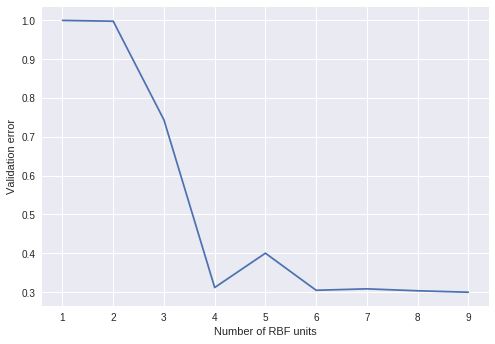

In [0]:
L=[]
check1,check2,check3=False,False,False
for number_RBF in range(1,10):
  phi=np.zeros((N,number_RBF))
  phi_test=np.zeros((N_test,number_RBF))
  LMS_weights, absolute_residual_error=LMS(number_RBF,targets2,targets2_test,1)
  if (absolute_residual_error<0.1 and check1==False):
    print(number_RBF," units are enough for a residual error less than 0.1")
    check1=True
  if (absolute_residual_error<0.01 and check2==False):
    print(number_RBF," units are enough for a residual error less than 0.01")
    check2=True
  if (absolute_residual_error<0.001 and check3==False):
    print(number_RBF," units are enough for a residual error less than 0.001")
    check3=True
  L.append(absolute_residual_error)
  #plt.plot(patterns_test,phi_test.dot(LMS_weights))
  #plt.plot(patterns,targets1)
  #plt.show()
plt.plot(range(1,10),L)
plt.xlabel("Number of RBF units")
plt.ylabel("Validation error")
plt.show()

It seems that the residual error cannot converge below 0.1 We need to apply a threshold to reduce the error.

In [0]:
def LMS2(number_RBF,target,target_test,coeff):
  means=np.linspace(0,2*np.pi,number_RBF)
  for i in range(number_RBF):
    sigma,mu=parameters_uniform(number_RBF)
    sigma=coeff*sigma
    phi[:,i]=gaussian(patterns,mu[i],sigma)
    phi_test[:,i]=gaussian(patterns_test,mu[i],sigma)

  LMS_weights=np.linalg.solve((phi.T).dot(phi),(phi.T).dot(target))
  output=phi_test.dot(LMS_weights)
  for i in range(len(output)):
    if (output[i]>=0):
       output[i]=1
    else:
      output[i]=-1
  absolute_residual_error=np.mean(abs(target_test-output))
  return LMS_weights, absolute_residual_error,output

4  units are enough for a residual error less than 0.1
4  units are enough for a residual error less than 0.01
4  units are enough for a residual error less than 0.001


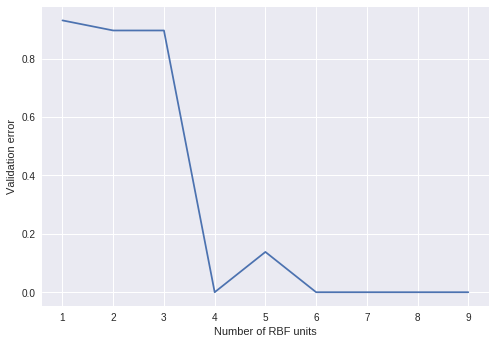

In [0]:
L=[]
check1,check2,check3=False,False,False
for number_RBF in range(1,10):
  phi=np.zeros((N,number_RBF))
  phi_test=np.zeros((N_test,number_RBF))
  LMS_weights, absolute_residual_error,output=LMS2(number_RBF,targets2,targets2_test,1)
  if (absolute_residual_error<0.1 and check1==False):
    print(number_RBF," units are enough for a residual error less than 0.1")
    check1=True
  if (absolute_residual_error<0.01 and check2==False):
    print(number_RBF," units are enough for a residual error less than 0.01")
    check2=True
  if (absolute_residual_error<0.001 and check3==False):
    print(number_RBF," units are enough for a residual error less than 0.001")
    check3=True
  L.append(absolute_residual_error)
  #plt.plot(patterns_test,phi_test.dot(LMS_weights))
  #plt.plot(patterns,targets1)
  #plt.show()
plt.plot(range(1,10),L)
plt.xlabel("Number of RBF units")
plt.ylabel("Validation error")
plt.show()

A simple threshold makes the error rapidly converge to 0

## 3.2 Regression with noise

In [0]:
noise=np.random.randn(N)*0.1
noise_test=np.random.randn(N_test)*0.1

In [0]:
patterns=np.arange(0,2*np.pi,0.1)
patterns_test=np.arange(0.5,2*np.pi,0.1)

In [0]:
patterns=patterns+noise
patterns_test=patterns_test+noise_test

### Effects of the number of RBF units and their width

We will use the absolute residual error to analyse both approaches

#### Batch approach

In [0]:
def batch_delta_rule(patterns,patterns_test,number_RBF,targets,targets_test,coeff,epochs,epochsCL,eta):
  errors_list=[]
  learning_error_list=[]
  W = np.random.normal(0, 1, number_RBF)
  phi=np.zeros((N,number_RBF))
  phi_test=np.zeros((N_test,number_RBF))
  

  
  sigma,mu=parameters_uniform(number_RBF)
  sigma=np.multiply(coeff,sigma)
  
  phi = fitting_hidden_layer(patterns, mu, sigma, number_RBF)
  phi_test = fitting_hidden_layer(patterns_test, mu, sigma, number_RBF)
  
  for i in range(epochs):
    error=phi.dot(W)-targets
    correction = -eta*(phi.T).dot(error)
    W = W + correction
    learning_error_list.append(np.mean(np.square(error)))
      
    
  output=phi_test.dot(W)
  if np.array_equal(targets_test,targets2_test):
    for o in range(len(output)):
      if (output[o]>=0):
        output[o]=1
      else:
        output[o]=-1
  absolute_residual_error=np.mean(abs(targets_test-output))
  return W,absolute_residual_error,learning_error_list

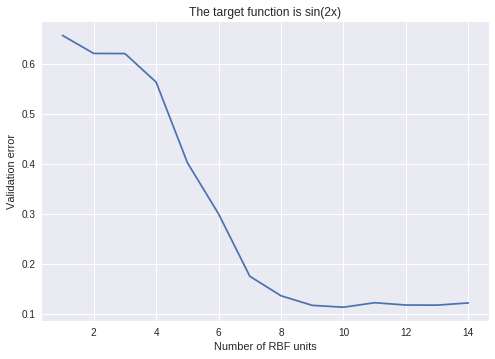

In [0]:
L=[]
for number_RBF in range(1,15):
 # print("Number RBF = ",number_RBF)
  weights, absolute_residual_error,learning_error_list=batch_delta_rule(patterns,patterns_test,number_RBF,targets1,targets1_test,1,1000,100,0.01)

  L.append(absolute_residual_error)
  #plt.plot(patterns_test,phi_test.dot(LMS_weights))
  #plt.plot(patterns,targets1)
  #plt.show()
  #plt.plot(learning_error_list)
  #plt.show()
  
plt.plot(range(1,15),L)
plt.xlabel("Number of RBF units")
plt.ylabel("Validation error")
plt.title("The target function is sin(2x)")

plt.show()

8 RBF units seem enough to have a small learning error and avoid overfitting

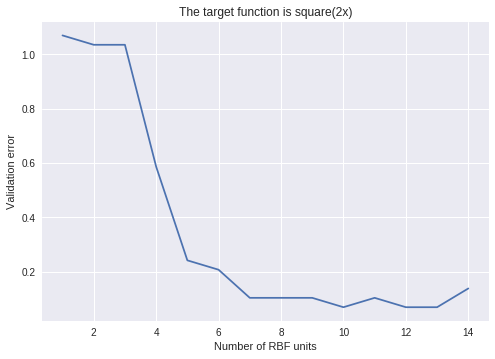

In [0]:
L=[]
for number_RBF in range(1,15):
  #print("Number RBF = ",number_RBF)
  weights, absolute_residual_error,learning_error_list=batch_delta_rule(patterns,patterns_test,number_RBF,targets2,targets2_test,1,1000,100,0.01)

  L.append(absolute_residual_error)
  #plt.plot(patterns_test,phi_test.dot(LMS_weights))
  #plt.plot(patterns,targets1)
  #plt.show()
  #plt.plot(learning_error_list)
  #plt.show()
  
plt.plot(range(1,15),L)
plt.xlabel("Number of RBF units")
plt.ylabel("Validation error")
plt.title("The target function is square(2x)")
plt.show()

We now have a few misclassifications in presence of noise
The best number of RBF units is 7

We now fix the number of RBF to 8 and investigate the influence of the width of the RBF nodes

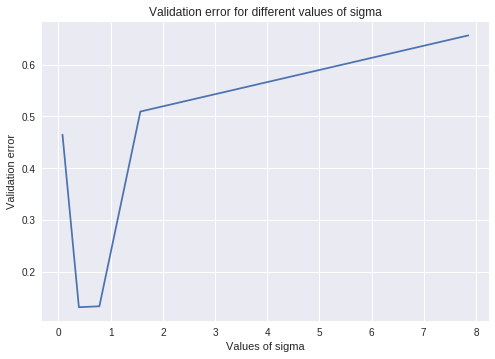

In [0]:
number_RBF=8
sigma=sigma=(2*np.pi)/number_RBF
L=[]
for coeff in [0.1,0.5,1,2,10]:
  phi=np.zeros((N,number_RBF))
  phi_test=np.zeros((N_test,number_RBF))
  weights, absolute_residual_error,learning_error_list=batch_delta_rule(patterns,patterns_test,number_RBF,targets1,targets1_test,coeff,1000,100,0.01)

  L.append(absolute_residual_error)
  #plt.plot(patterns_test,phi_test.dot(LMS_weights))
  #plt.plot(patterns,targets1)
  #plt.show()
plt.plot(np.multiply([0.1,0.5,1,2,10],sigma),L)
plt.ylabel("Validation error")
plt.xlabel("Values of sigma")
plt.title("Validation error for different values of sigma")
plt.show()

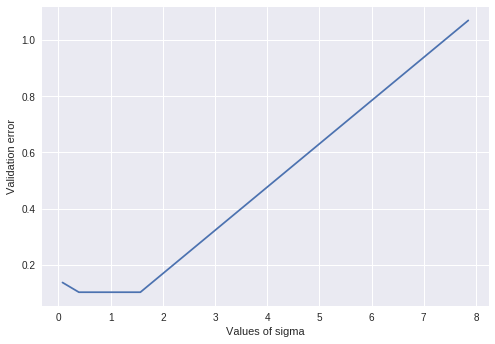

In [0]:
number_RBF=8
L=[]
sigma=(2*np.pi)/number_RBF
for coeff in [0.1,0.5,1,2,10]:
  phi=np.zeros((N,number_RBF))
  phi_test=np.zeros((N_test,number_RBF))
  weights, absolute_residual_error,learning_error_list=batch_delta_rule(patterns,patterns_test,number_RBF,targets2,targets2_test,coeff,1000,100,0.01)

  L.append(absolute_residual_error)
  #plt.plot(patterns_test,phi_test.dot(LMS_weights))
  #plt.plot(patterns,targets1)
  #plt.show()
plt.plot(np.multiply([0.1,0.5,1,2,10],sigma),L)
plt.xlabel("Values of sigma")
plt.ylabel("Validation error")
plt.show()

This study shows that we have to choose a coefficient of 1 for sigma, which means that sigma must be equal to 2pi/number_RBF

#### Delta rule online approach

In [0]:
def parameters_uniform2(number_RBF):
  centers = [(i+0.5) * 2 * np.pi/number_RBF for i in range(number_RBF)]
  return centers

In [0]:
def sequential_delta_rule(patterns,number_RBF,targets,targets_test,coeff,epochs,eta):
  errors_list=[]
  learning_error_list=[]
  W=np.random.randn(number_RBF,1)
  phi=np.zeros((N,number_RBF))
  phi_test=np.zeros((N_test,number_RBF))
  
  for i in range(epochs):
    sigma,mu=parameters_uniform(number_RBF)
    sigma=np.multiply(coeff,sigma)
    tmp=[]
    for k in range(np.shape(targets)[0]):
      for j in range(number_RBF):
        phi[k,j]=gaussian(patterns,mu[j],sigma)[k]
      e=targets[k]-phi[k,:].dot(W)
      error=np.float(0.5*(e**2))
      tmp.append(error)
      W=W+eta*e*phi[k,:].reshape(number_RBF,1)
    for j in range(number_RBF):
      phi_test[:,j]=gaussian(patterns_test,mu[j],sigma)
    learning_error=np.mean(tmp)
    learning_error_list.append(learning_error)
    
  output=phi_test.dot(W)
  if targets_test.all() == targets2_test.all():
    for o in range(len(output)):
      if (output[o]>=0):
        output[o]=1
      else:
        output[o]=-1
  absolute_residual_error=np.mean(abs(targets_test-output))
  errors_list.append(absolute_residual_error)
  return W,errors_list,learning_error_list

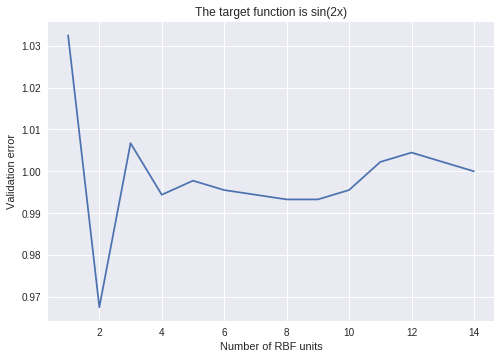

In [0]:
L=[]
for number_RBF in range(1,15):
  weights, errors_list,learning_error_list=sequential_delta_rule(patterns,number_RBF,targets1,targets1_test,1,100,0.1)

  L.append(errors_list)
plt.plot(range(1,15),L)
plt.xlabel("Number of RBF units")
plt.ylabel("Validation error")
plt.title("The target function is sin(2x)")
plt.show()

The delta rule is much worse than least mean squares. 

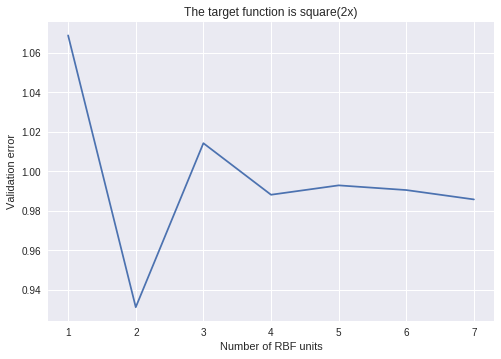

In [0]:
L=[]
for number_RBF in range(1,8):
  weights, errors_list,learning_error_list=sequential_delta_rule(patterns,number_RBF,targets2,targets2_test,1,100,0.1)

  L.append(errors_list)
plt.plot(range(1,8),L)
plt.xlabel("Number of RBF units")
plt.ylabel("Validation error")
plt.title("The target function is square(2x)")
plt.show()

We can fix number_RBF to 4 and see the influence of the widths of the units

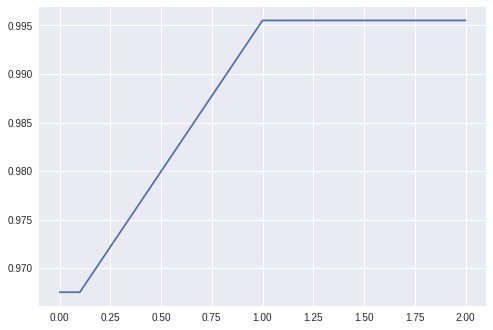

In [0]:
L=[]
for coeff in [0.001,0.01,0.1,1,2]:
  weights, errors_list,learning_error_list=sequential_delta_rule(patterns,number_RBF,targets1,targets1_test,coeff,100,0.1)

  L.append(errors_list)
plt.plot([0.001,0.01,0.1,1,2],L)
plt.show()

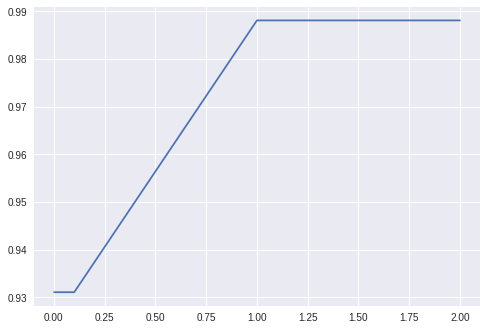

In [0]:
L=[]
for coeff in [0.001,0.01,0.1,1,2]:
  weights, errors_list,learning_error_list=sequential_delta_rule(patterns,number_RBF,targets2,targets2_test,coeff,100,0.1)

  L.append(errors_list)
plt.plot([0.001,0.01,0.1,1,2],L)
plt.show()

For the delta rule approach, the width of the units cannot avoid the test error to be very high.

### Influence of eta

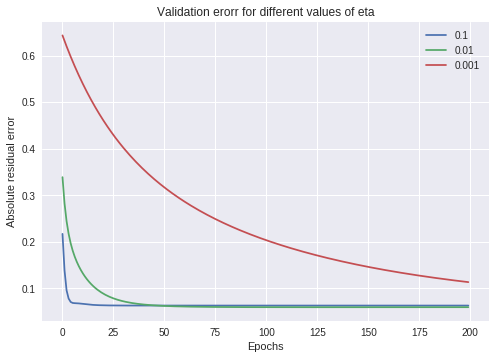

In [0]:
for eta in [0.1,0.01,0.001]:
  number_RBF=5

  weights, errors_list,learning_error_list=sequential_delta_rule(patterns,number_RBF,targets1,targets1_test,1,200,eta)
  plt.plot(learning_error_list)
  plt.legend([0.1,0.01,0.001])
plt.title("Validation erorr for different values of eta")
plt.xlabel("Epochs")
plt.ylabel("Absolute residual error")
plt.show()

Here the convergence is quicker if eta is not too small. In the three cases, the value of convergence is the same.

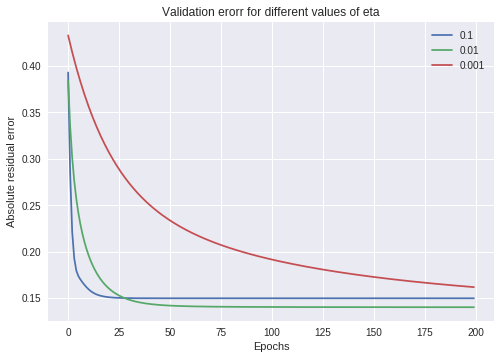

In [0]:
for eta in [0.1,0.01,0.001]:
  number_RBF=5

  weights, errors_list,learning_error_list=sequential_delta_rule(patterns,number_RBF,targets2,targets2_test,1,200,eta)
  plt.plot(learning_error_list)
  plt.legend([0.1,0.01,0.001])
plt.title("Validation erorr for different values of eta")
plt.xlabel("Epochs")
plt.ylabel("Absolute residual error")
plt.show()

A small value of eta makes the convergence slower, 0.01 seems good

### Effects of the widths of RBFs

The main effect of the widths of the RBF units is too control the overlapping of the units. It has an effect on the variance of the estimation. 

### Positioning the RBF nodes

We chose to position the RBF nodes uniformly between 0 and 2pi
Let's see if it is better than a random positioning.

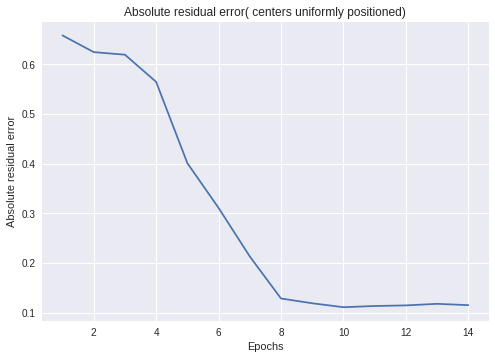

In [0]:
L=[]
for number_RBF in range(1,15):
  phi=np.zeros((N,number_RBF))
  phi_test=np.zeros((N_test,number_RBF))
  weights, absolute_residual_error,learning_error_list=batch_delta_rule(patterns,patterns_test,number_RBF,targets1,targets1_test,1,1000,100,0.01)

  L.append(absolute_residual_error)
  #plt.plot(patterns_test,phi_test.dot(LMS_weights))
  #plt.plot(patterns,targets1)
  #plt.show()
plt.plot(range(1,15),L)
plt.title("Absolute residual error( centers uniformly positioned)")
plt.xlabel("Epochs")
plt.ylabel("Absolute residual error")
plt.show()

In [0]:
def batch_delta_rule_random_centers(patterns,patterns_test,number_RBF,targets,targets_test,coeff,epochs,epochsCL,eta):
  errors_list=[]
  learning_error_list=[]
  W = np.random.normal(0, 1, number_RBF)
  phi=np.zeros((N,number_RBF))
  phi_test=np.zeros((N_test,number_RBF))
  

  
  sigma,mu=parameters_uniform(number_RBF)
  sigma=coeff*sigma
  mu = np.random.random(number_RBF)*np.pi*2
  
  phi = fitting_hidden_layer(patterns, mu, sigma, number_RBF)
  phi_test = fitting_hidden_layer(patterns_test, mu, sigma, number_RBF)
  
  for i in range(epochs):
    error=phi.dot(W)-targets
    correction = -eta*(phi.T).dot(error)
    W = W + correction
    learning_error_list.append(np.mean(np.square(error)))
      
    
  output=phi_test.dot(W)
  if np.array_equal(targets_test,targets2_test):
    for o in range(len(output)):
      if (output[o]>=0):
        output[o]=1
      else:
        output[o]=-1
  absolute_residual_error=np.mean(abs(targets_test-output))
  return W,absolute_residual_error,learning_error_list

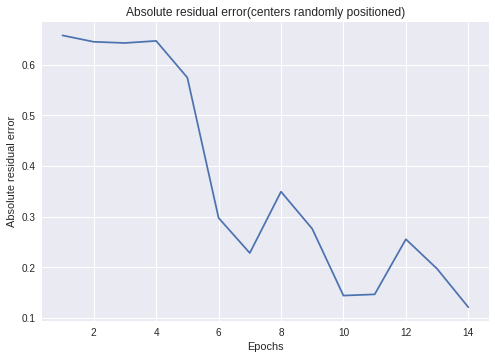

In [0]:
L=[]
for number_RBF in range(1,15):
  phi=np.zeros((N,number_RBF))
  phi_test=np.zeros((N_test,number_RBF))
  weights, absolute_residual_error,learning_error_list=batch_delta_rule_random_centers(patterns,patterns_test,number_RBF,targets1,targets1_test,1,1000,100,0.01)

  L.append(absolute_residual_error)
  #plt.plot(patterns_test,phi_test.dot(LMS_weights))
  #plt.plot(patterns,targets1)
  #plt.show()
plt.plot(range(1,15),L)
plt.title("Absolute residual error(centers randomly positioned)")
plt.xlabel("Epochs")
plt.ylabel("Absolute residual error")
plt.show()

It seems that a random positioning does not really increase the residual error in comparison with a uniform choice for the centers

### Patterns without noise

In [0]:
patterns=np.arange(0,2*np.pi,0.1)
patterns_test=np.arange(0.5,2*np.pi,0.1)

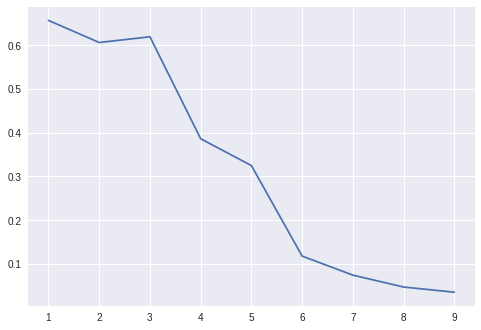

In [0]:
L=[]
for number_RBF in range(1,10):
  phi=np.zeros((N,number_RBF))
  phi_test=np.zeros((N_test,number_RBF))
  weights, absolute_residual_error,learning_error_list=batch_delta_rule(patterns,patterns_test,number_RBF,targets1,targets1_test,1,10000,100,0.01)

  L.append(absolute_residual_error)

plt.plot(range(1,10),L)
plt.show()

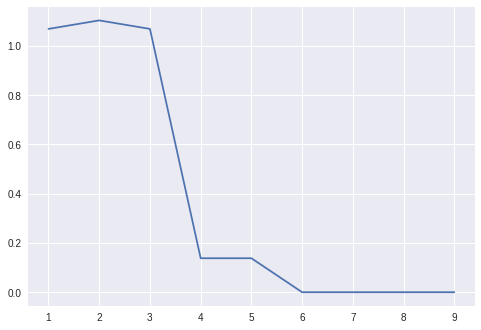

In [0]:
L=[]
for number_RBF in range(1,10):
  phi=np.zeros((N,number_RBF))
  phi_test=np.zeros((N_test,number_RBF))
  weights, absolute_residual_error,learning_error_list=batch_delta_rule(patterns,patterns_test,number_RBF,targets2,targets2_test,1,10000,100,0.01)

  L.append(absolute_residual_error)
  #plt.plot(patterns_test,output)
  #plt.plot(patterns,targets2)
  #plt.show()
plt.plot(range(1,10),L)
plt.show()

So a big number of RBF units is not very robust in presence of noise

We now fix the number of RBF to 9 and investigate the influence of the width of the RBF nodes

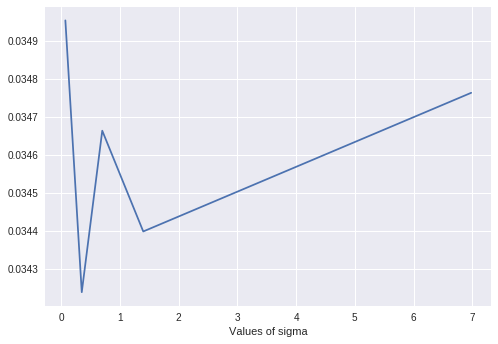

In [0]:
number_RBF=9
sigma=sigma=(2*np.pi)/9
L=[]
for coeff in [0.1,0.5,1,2,10]:
  phi=np.zeros((N,number_RBF))
  phi_test=np.zeros((N_test,number_RBF))
  weights, absolute_residual_error,learning_error_list=batch_delta_rule(patterns,patterns_test,number_RBF,targets1,targets1_test,1,10000,100,0.01)

  L.append(absolute_residual_error)
  #plt.plot(patterns_test,phi_test.dot(LMS_weights))
  #plt.plot(patterns,targets1)
  #plt.show()
plt.plot(np.multiply([0.1,0.5,1,2,10],sigma),L)
plt.xlabel("Values of sigma")
plt.show()

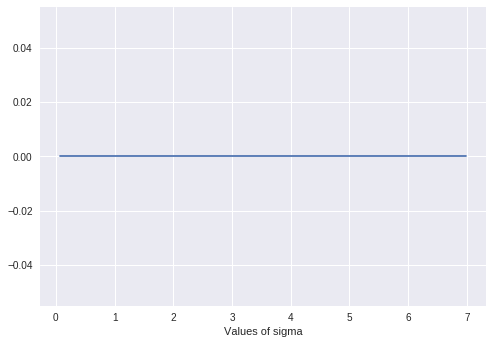

In [0]:
number_RBF=9
L=[]
sigma=(2*np.pi)/9
for coeff in [0.1,0.5,1,2,10]:
  phi=np.zeros((N,number_RBF))
  phi_test=np.zeros((N_test,number_RBF))
  weights, absolute_residual_error,learning_error_list=batch_delta_rule(patterns,patterns_test,number_RBF,targets2,targets2_test,1,10000,100,0.01)

  L.append(absolute_residual_error)
  #plt.plot(patterns_test,phi_test.dot(LMS_weights))
  #plt.plot(patterns,targets1)
  #plt.show()
plt.plot(np.multiply([0.1,0.5,1,2,10],sigma),L)
plt.xlabel("Values of sigma")
plt.show()

We still have to choose a coefficient of 1 for sigma, which means that sigma must be equal to 2pi/number_RBF

In [0]:
def parameters_uniform2(number_RBF):
  centers = [(i+0.5) * 2 * np.pi/number_RBF for i in range(number_RBF)]
  return centers

In [0]:
def sequential_delta_rule(patterns,number_RBF,targets,targets_test,coeff,epochs,eta):
  errors_list=[]
  learning_error_list=[]
  W=np.random.randn(number_RBF,1)
  phi=np.zeros((N,number_RBF))
  phi_test=np.zeros((N_test,number_RBF))
  
  for i in range(epochs):
    sigma,mu=parameters_uniform(number_RBF)
    sigma=np.multiply(coeff,sigma)
    tmp=[]
    for k in range(np.shape(targets)[0]):
      for j in range(number_RBF):
        phi[k,j]=gaussian(patterns,mu[j],sigma)[k]
      e=targets[k]-phi[k,:].dot(W)
      error=np.float(0.5*(e**2))
      tmp.append(error)
      W=W+eta*e*phi[k,:].reshape(number_RBF,1)
    for j in range(number_RBF):
      phi_test[:,j]=gaussian(patterns_test,mu[j],sigma)
    learning_error=np.mean(tmp)
    learning_error_list.append(learning_error)
    
  output=phi_test.dot(W)
  if targets_test.all() == targets2_test.all():
    for o in range(len(output)):
      if (output[o]>=0):
        output[o]=1
      else:
        output[o]=-1
  absolute_residual_error=np.mean(abs(targets_test-output))
  errors_list.append(absolute_residual_error)
  return W,errors_list,learning_error_list

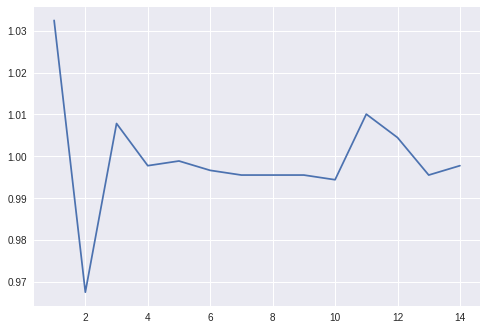

In [0]:
L=[]
for number_RBF in range(1,15):
  weights, errors_list,learning_error_list=sequential_delta_rule(patterns,number_RBF,targets1,targets1_test,1,100,0.1)

  L.append(errors_list)
plt.plot(range(1,15),L)
plt.show()

The delta rule is much worse than least mean squares. 

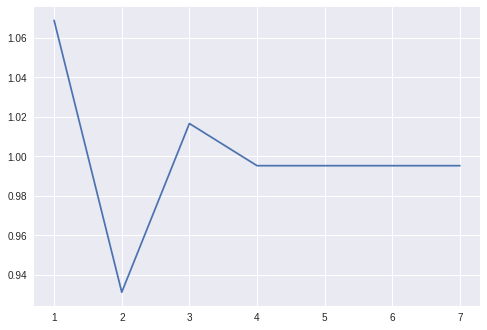

In [0]:
L=[]
for number_RBF in range(1,8):
  weights, errors_list,learning_error_list=sequential_delta_rule(patterns,number_RBF,targets2,targets2_test,1,100,0.1)

  L.append(errors_list)
plt.plot(range(1,8),L)
plt.show()

We can fix number_RBF to 2 and see the influence of the widths of the units

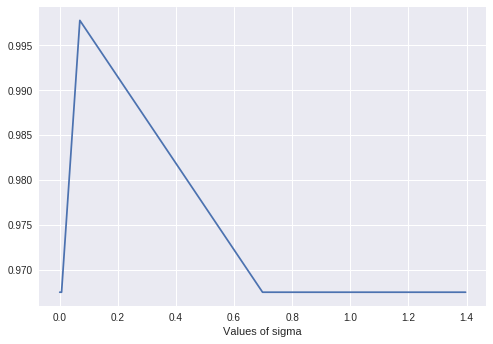

In [0]:
number_RBF=2
L=[]
for coeff in [0.001,0.01,0.1,1,2]:
  weights, errors_list,learning_error_list=sequential_delta_rule(patterns,number_RBF,targets1,targets1_test,coeff,100,0.1)

  L.append(errors_list)
plt.plot(np.multiply([0.001,0.01,0.1,1,2],sigma),L)
plt.xlabel("Values of sigma")
plt.show()

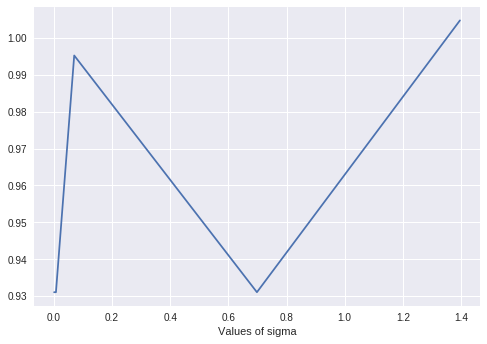

In [0]:
L=[]
for coeff in [0.001,0.01,0.1,1,2]:
  weights, errors_list,learning_error_list=sequential_delta_rule(patterns,number_RBF,targets2,targets2_test,coeff,100,0.1)

  L.append(errors_list)
plt.plot(np.multiply([0.001,0.01,0.1,1,2],sigma),L)
plt.xlabel("Values of sigma")
plt.show()

For the delta rule approach, the width of the units cannot avoid the test error to be very high.

### Influence of eta

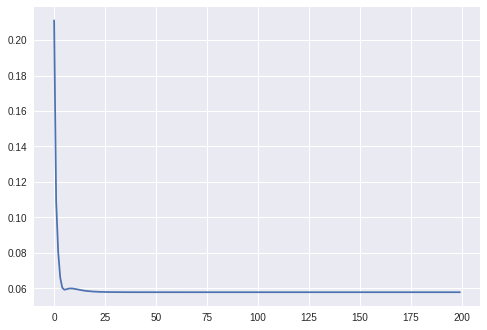

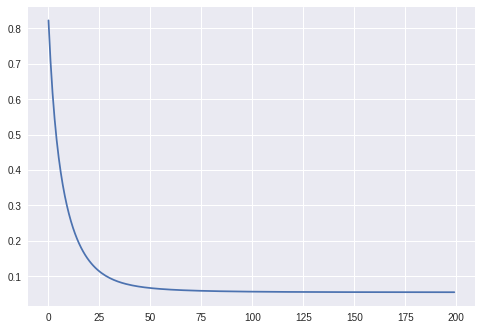

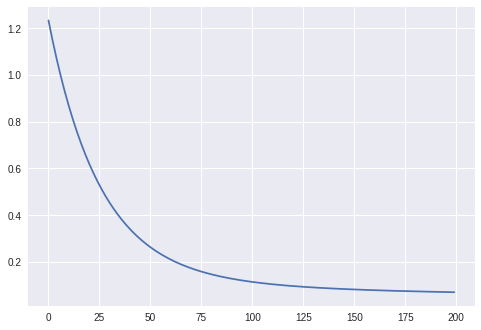

In [0]:
for eta in [0.1,0.01,0.001]:
  number_RBF=5

  weights, errors_list,learning_error_list=sequential_delta_rule(patterns,number_RBF,targets1,targets1_test,1,200,eta)
  plt.plot(learning_error_list)
  plt.show()

Here the convergence is quicker if eta is not too small. In the three cases, the value of convergence is the same.

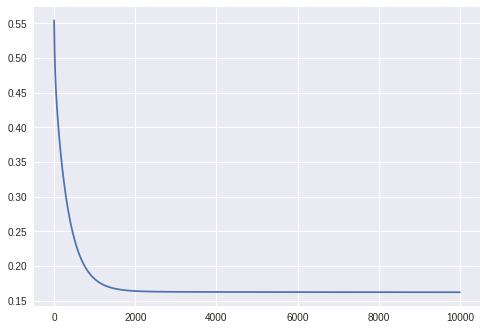

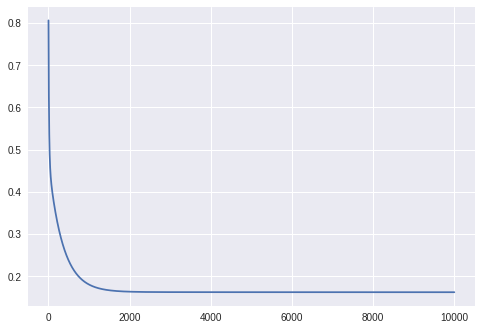

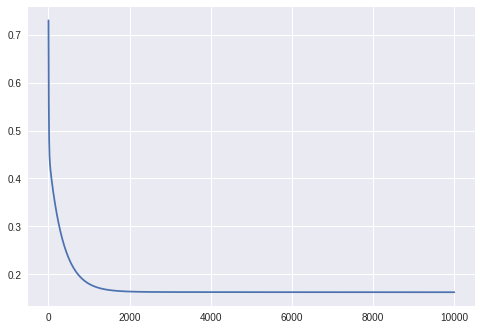

In [0]:
for eta in [0.1,0.01,0.001]:
  number_RBF=5

  weights, absolute_residual_error,learning_error_list=batch_delta_rule(patterns,patterns_test,number_RBF,targets1,targets1_test,1,10000,100,0.01)
  plt.plot(learning_error_list)
  plt.show()

A COMMENTER

### Positioning the RBF nodes

We chose to position the RBF nodes uniformly between 0 and 2pi
Let's see if it is better than a random positioning.

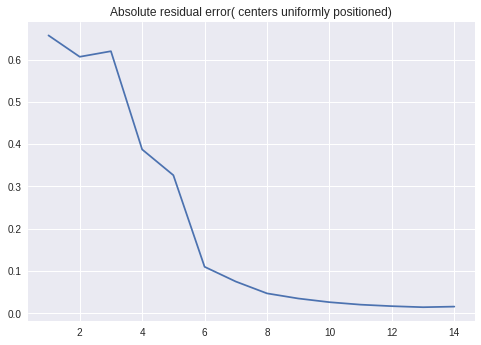

In [0]:
L=[]
for number_RBF in range(1,15):
  phi=np.zeros((N,number_RBF))
  phi_test=np.zeros((N_test,number_RBF))
  weights, absolute_residual_error,learning_error_list=batch_delta_rule(patterns,patterns_test,number_RBF,targets1,targets1_test,1,10000,100,0.01)

  L.append(absolute_residual_error)
  #plt.plot(patterns_test,phi_test.dot(LMS_weights))
  #plt.plot(patterns,targets1)
  #plt.show()
plt.plot(range(1,15),L)
plt.title("Absolute residual error( centers uniformly positioned)")
plt.show()

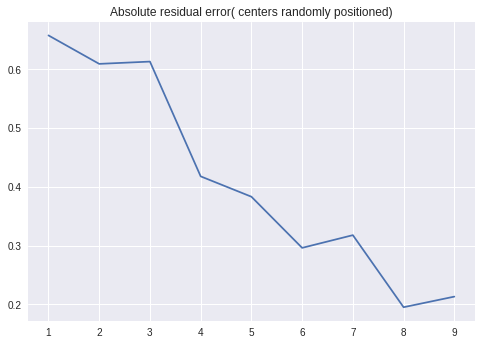

In [0]:
L=[]
for number_RBF in range(1,10):
  phi=np.zeros((N,number_RBF))
  phi_test=np.zeros((N_test,number_RBF))
  weights, absolute_residual_error,learning_error_list=batch_delta_rule_random_centers(patterns,patterns_test,number_RBF,targets1,targets1_test,1,10000,100,0.01)

  L.append(absolute_residual_error)
  #plt.plot(patterns_test,phi_test.dot(LMS_weights))
  #plt.plot(patterns,targets1)
  #plt.show()
plt.plot(range(1,10),L)
plt.title("Absolute residual error( centers randomly positioned)")
plt.show()

It seems that a random positioning does not really increase the residual error in comparison with a uniform choice for the centers, provided the number of RBF units is high enough

### RBF vs perceptron

#### RBF

Our optimal RBF network has 8 units and sigma equals 2pi/number_RBF

In [0]:
patterns=np.arange(0,2*np.pi,0.1)+noise

In [0]:
patterns_test=np.arange(0.5,2*np.pi,0.1)+noise_test

0.12367431034786026


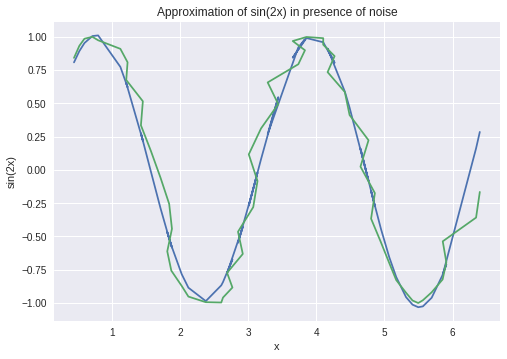

In [0]:
number_RBF=8
phi=np.zeros((N,number_RBF))
phi_test=np.zeros((N_test,number_RBF))
LMS_weights, absolute_residual_error=LMS(number_RBF,targets1,targets1_test,1)

print(absolute_residual_error)
output=phi_test.dot(LMS_weights)
plt.plot(patterns_test,output)
plt.title("Approximation of sin(2x) in presence of noise")
plt.xlabel("x")
plt.ylabel("sin(2x)")
plt.plot(patterns_test,targets1_test)
plt.show()

0.06896551724137931


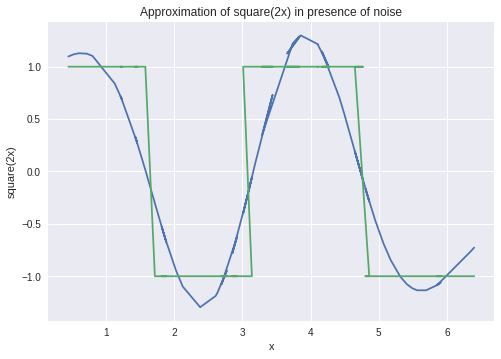

In [0]:
number_RBF=8
phi=np.zeros((N,number_RBF))
phi_test=np.zeros((N_test,number_RBF))
LMS_weights, absolute_residual_error,output=LMS2(number_RBF,targets2,targets2_test,1)


print(absolute_residual_error)
output=phi_test.dot(LMS_weights)
plt.plot(patterns_test,output)
plt.title("Approximation of square(2x) in presence of noise")
plt.xlabel("x")
plt.ylabel("square(2x)")
plt.plot(patterns_test,targets2_test)
plt.show()


#### One hidden layer perceptron

In [0]:
def forward(X,W,V):
  WX=W.dot(X)
  H=function_phi(WX)
  H=np.vstack([H,np.ones(np.shape(H)[1])])
  VH=V.dot(H)
  O=function_phi(VH)
  return O,H

In [0]:
def backward(T,O,H,V,Nhidden):
  delta_o = (O-T)* (phi_prime(O))
  delta_h=np.dot(V.T,delta_o)*(phi_prime(H))
  delta_h=delta_h[0:Nhidden]
  return delta_o,delta_h

In [0]:
def weightUpdate(delta_o,delta_h,X,H,W,V,eta,dw,dv,alpha):
  dw= alpha*dw-(1-alpha)*(delta_h.dot(X.T))
  W=W+eta*dw
  V=V+eta*dv
  return W,V,dw,dv

In [0]:
def backpropagation(X,T,W,V,eta,epochs,Nhidden,alpha=0.9):
  errors_list=[]
  misclassifications_list=[]
  dw=np.ones(np.shape(W))
  dv=np.ones(np.shape(V))
  all_weights1=[]
  all_weights2=[]
  for i in range(epochs):
    all_weights1.append(W)
    all_weights2.append(V)
    O,H=forward(X,W,V)
    if T.all()==targets2.all():
      for i in range(len(O)):
        if (O[0][i]>=0):
          O[0][i]=1
        else:
          O[0][i]=-1
    
    errors_list.append(np.mean(np.square(O-T)))
    
    delta_o,delta_h=backward(T,O,H,V,Nhidden)
    
    W,V,dw,dv=weightUpdate(delta_o,delta_h,X,H,W,V,eta,dw,dv,alpha)
    
  all_weights1.append(W)
  all_weights2.append(V)
  return W,V,errors_list,all_weights1,all_weights2
 

In [0]:
def function_phi(x):
  return 2/(1+np.exp(-x))-1

In [0]:
def phi_prime(x):
  return 0.5*((1+function_phi(x))*(1-function_phi(x)))

In [0]:
Nhidden=4
patterns=np.arange(0,2*np.pi,0.1)+noise
patterns=np.vstack((patterns,np.ones(np.shape(patterns))))
weights1=np.random.randn(Nhidden,np.shape(patterns)[0])
weights2=np.random.randn(1,Nhidden+1)
eta=0.01
epochs=200

W,V,errors_list,all_weights1,all_weights2=backpropagation(patterns,targets1,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)

In [0]:
def test(X,T):
  O,H=forward(X,all_weights1[-1],all_weights2[-1])
  errors_test=np.mean(np.square(O-T))
  return errors_test,O

In [0]:
patterns_test=np.arange(0.5,2*np.pi,0.1)+noise_test
patterns_test=np.vstack((patterns_test,np.ones(np.shape(patterns_test))))

In [0]:
errors_test,O=test(patterns_test,targets1_test)

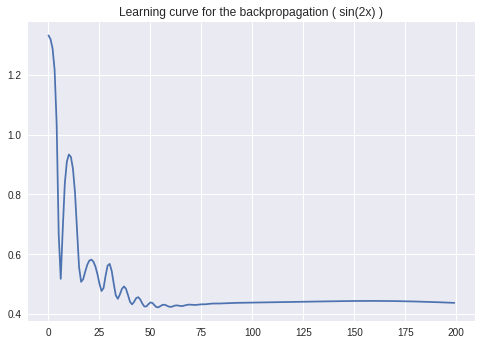

In [0]:
plt.plot(errors_list)
plt.title('Learning curve for the backpropagation ( sin(2x) )')


plt.show()

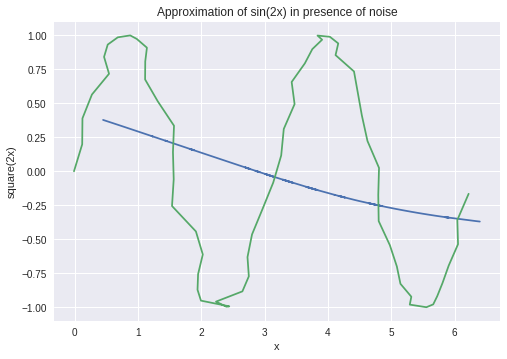

In [0]:
plt.plot(patterns_test[0],O[0])
plt.plot(patterns[0,:],targets1)
plt.title("Approximation of sin(2x) in presence of noise")
plt.xlabel("x")
plt.ylabel("square(2x)")
plt.show()

In [0]:
print("The validation error is ",errors_test )

The validation error is  0.5661419936742111


In [0]:
Nhidden=4
patterns=np.arange(0,2*np.pi,0.1)+noise
patterns=np.vstack((patterns,np.ones(np.shape(patterns))))
weights1=np.random.randn(Nhidden,np.shape(patterns)[0])
weights2=np.random.randn(1,Nhidden+1)
eta=0.01
epochs=200

W,V,errors_list,all_weights1,all_weights2=backpropagation(patterns,targets2,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)

In [0]:
errors_test,O=test(patterns_test,targets2_test)

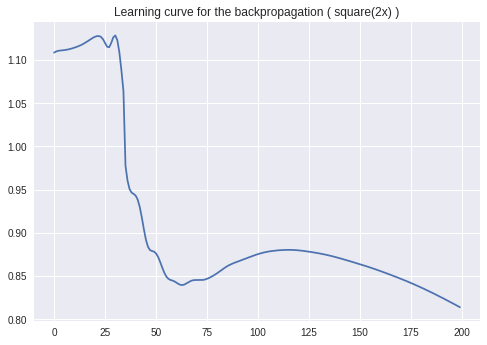

In [0]:
plt.plot(errors_list)
plt.title('Learning curve for the backpropagation ( square(2x) )')


plt.show()

In [0]:
print("The validation error is ",errors_test )

The validation error is  0.8826654708825029


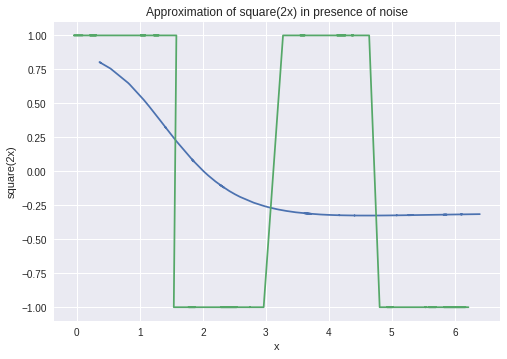

In [0]:
plt.plot(patterns_test[0],O[0])
plt.plot(patterns[0,:],targets2)
plt.title("Approximation of square(2x) in presence of noise")
plt.xlabel("x")
plt.ylabel("square(2x)")
plt.show()

To conclude, the one hidden layer perceptron is very bad to approximate these two functions.

## 3.3 Competitive learning (CL) to initialise RBF units

In [0]:
def similarity(x,weight):
  return np.linalg.norm(x-weight)

In [0]:
def winner_function(x,weights_list):
  winner=weights_list[0]
  indice=0
  sim_list=[]
  for weight in weights_list:
    sim_list.append(similarity(x,weight))
  indice=np.argmin(sim_list)
  winner=weights_list[indice]
  return winner,indice

In [0]:
def weight_modification(x,weight,eta):
  weight=weight+eta*(x-weight)
  eta=0.99*eta
  return weight

In [0]:
def choice_training_vector(patterns):
  sample=random.choice(patterns)
  return sample

In [0]:
def CL_initialisation_RBF(patterns,number_RBF,epochsCL,eta_CL):
  sigma, centers = parameters_uniform(number_RBF)
  for i in range(epochsCL):
    sample=choice_training_vector(patterns)
    winner,indice=winner_function(sample,centers)
    winner=weight_modification(sample,winner,eta_CL)
    centers[indice]=winner
  return sigma,centers

In [0]:
def sequential_delta_rule_withCL(patterns,number_RBF,targets,targets_test,coeff,epochs,epochsCL,eta,eta_CL):
  errors_list=[]
  learning_error_list=[]
  W=np.random.randn(number_RBF,1)
  phi=np.zeros((N,number_RBF))
  phi_test=np.zeros((N_test,number_RBF))
  
  sigma,mu=CL_initialisation_RBF(patterns,number_RBF,epochsCL,eta_CL)
  sigma=np.multiply(coeff,sigma)
  
  for i in range(epochs):
    tmp=[]
    for k in range(np.shape(targets)[0]):
      for j in range(number_RBF):
        phi[k,j]=gaussian(patterns,mu[j],sigma)[k]
      e=targets[k]-phi[k,:].dot(W)
      error=np.float(0.5*(e**2))
      tmp.append(error)
      W=W+eta*e*phi[k,:].reshape(number_RBF,1)
    learning_error=np.mean(tmp)
    learning_error_list.append(learning_error)
  for j in range(number_RBF):
    phi_test[:,j]=gaussian(patterns_test,mu[j],sigma)
    
  output=phi_test.dot(W)
  if targets_test.all() == targets2_test.all():
    for o in range(len(output)):
      if (output[o]>=0):
        output[o]=1
      else:
        output[o]=-1
  absolute_residual_error=np.mean(abs(targets_test-output))
  return W,absolute_residual_error,learning_error_list

In [0]:
def batch_delta_rule_withCL(patterns,patterns_test,number_RBF,targets,targets_test,coeff,coeffWL,epochs,epochsCL,eta,eta_CL,initial_learning_rate,hard=True,initial_radius=1):
  learning_error_list=[]
  if (np.ndim(patterns)==1):
    W = np.random.normal(0, 1, (number_RBF))
  else:
    W = np.random.normal(0, 1, (number_RBF,np.shape(patterns)[1]))
  
  if hard==False:
    sigma,mu,centers_init=CL_soft_initialisation_RBF(patterns,number_RBF,epochsCL,30,initial_learning_rate,initial_radius)
  else:
    sigma,mu=CL_initialisation_RBF(patterns,number_RBF,epochsCL,eta_CL)
  sigma=np.multiply(coeff,sigma)
  
  phi = fitting_hidden_layer(patterns, mu, sigma, number_RBF)
  phi_test = fitting_hidden_layer(patterns_test, mu, sigma, number_RBF)
  
  
  for i in range(epochs):
    error=phi.dot(W)-targets
    correction = -eta*(phi.T).dot(error)
    W = W + correction
    learning_error_list.append(np.mean(np.square(error)))
      
    
  output_learning=phi.dot(W)
  plt.scatter(patterns,targets,color='red')
  plt.scatter(patterns,output_learning,color="blue")
  plt.legend(['Targets','Outputs'])
  plt.show()
  output=phi_test.dot(W)
  if np.array_equal(targets_test,targets2_test):
    for o in range(len(output)):
      if (output[o]>=0):
        output[o]=1
      else:
        output[o]=-1
  absolute_residual_error=np.mean(abs(targets_test-output))
  if hard==True:
    return W,absolute_residual_error,learning_error_list,mu,output,
  return W,absolute_residual_error,learning_error_list,mu,output,centers_init

In [0]:
def LMS_withCL(patterns,patterns_test,number_RBF,targets,targets_test,coeff,coeffWL,epochs,epochsCL,eta,eta_CL,initial_learning_rate,hard=True,initial_radius=1):
  if (np.ndim(patterns)==1):
    W = np.random.normal(0, 1, number_RBF)
  else:
    W = np.random.normal(0, 1, (number_RBF,np.shape(patterns)[1]))
    
  if hard==False:
    sigma,mu,centers_init=CL_soft_initialisation_RBF(patterns,number_RBF,epochsCL,30,initial_learning_rate,initial_radius)
  else:
    sigma,mu=CL_initialisation_RBF(patterns,number_RBF,epochsCL,eta_CL)
    sigma=np.multiply(coeff,sigma)
  
  
  phi = fitting_hidden_layer(patterns, mu, sigma, number_RBF)
  phi_test = fitting_hidden_layer(patterns_test, mu, sigma, number_RBF)

  LMS_weights=np.linalg.solve((phi.T).dot(phi),(phi.T).dot(targets))
  output=phi_test.dot(LMS_weights)
  absolute_residual_error=np.mean(abs(targets_test-output))
  return LMS_weights, absolute_residual_error,mu,output,centers_init

### Comparing manually positioning of the RBF nodes with the CL-based approach

#### CL-based approach

Noise-free

In [0]:
patterns=np.arange(0,2*np.pi,0.1)

In [0]:
patterns_test=np.arange(0.5,2*np.pi,0.1)

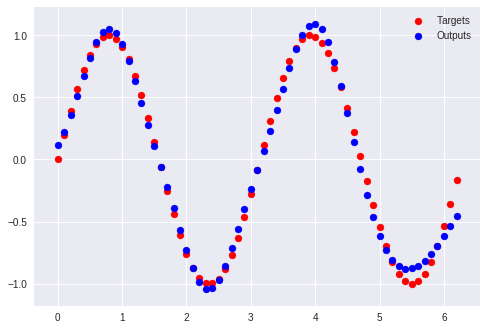

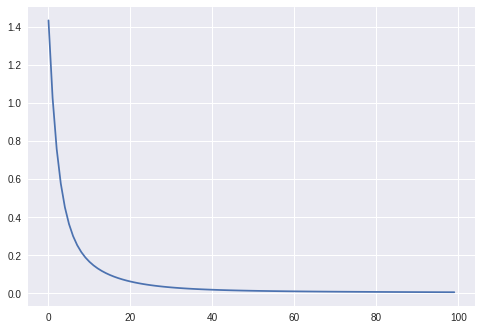

In [0]:
weights, absolute_residual_error,learning_error_list,centers,output=batch_delta_rule_withCL(patterns,patterns_test,15,targets1,targets1_test,1,0.5,100,1000,0.01,0.2,0.8)
plt.plot(learning_error_list)
plt.show()

In [0]:
print("The validation error on the test set equals ",absolute_residual_error)

The validation error on the test set equals  0.06022275618368285


Noisy patterns

In [0]:
patterns=np.arange(0,2*np.pi,0.1)+noise

In [0]:
patterns_test=np.arange(0.5,2*np.pi,0.1)+noise_test

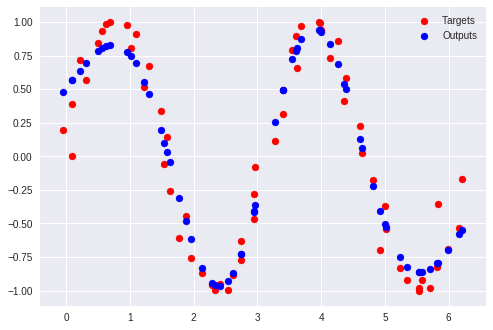

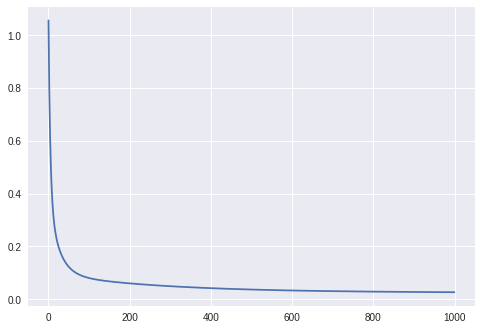

In [0]:
weights, absolute_residual_error,learning_error_list,centers,output=batch_delta_rule_withCL(patterns,patterns_test,8,targets1,targets1_test,1,0.5,1000,100,0.01,0.2,0.99)
plt.plot(learning_error_list)
plt.show()

In [0]:
print("The validation error on the test set equals ",absolute_residual_error)

The validation error on the test set equals  0.10561533006071427


#### Manually positioning

Noise-free

In [0]:
patterns=np.arange(0,2*np.pi,0.1)

In [0]:
patterns_test=np.arange(0.5,2*np.pi,0.1)

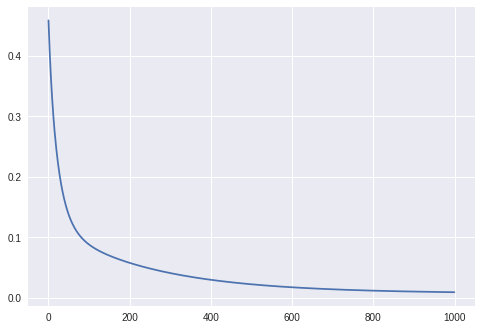

In [0]:
weights, absolute_residual_error,learning_error_list=batch_delta_rule(patterns,patterns_test,8,targets1,targets1_test,1,1000,100,0.01)
plt.plot(learning_error_list)
plt.show()

In [0]:
print("The validation error on the test set equals ",absolute_residual_error)

The validation error on the test set equals  0.050986398730740234


Noisy patterns

In [0]:
patterns=np.arange(0,2*np.pi,0.1)+noise

In [0]:
patterns_test=np.arange(0.5,2*np.pi,0.1)+noise_test

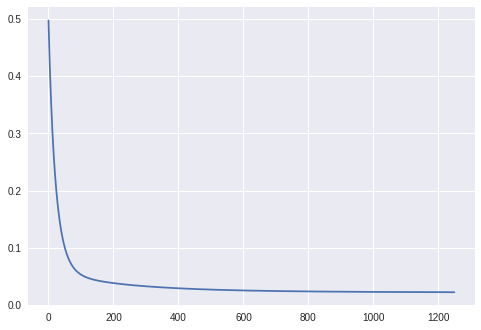

In [0]:
weights, absolute_residual_error,learning_error_list=batch_delta_rule(patterns,patterns_test,8,targets1,targets1_test,1,1250,100,0.01)
plt.plot(learning_error_list)
plt.show()

In [0]:
print("The validation error on the test set equals ",absolute_residual_error)

The validation error on the test set equals  0.09523547032427274


We notice that the generalisation is slightly better when we use the CL approach. However, the convergence is quite the same and the position of the nodes does not vary much because the points are regularly positioned between 0 and 2pi

### Strategy to avoid dead units

In [0]:
def decay_radius(initial_radius, i, time_constant):
    return initial_radius * np.exp(-i / time_constant)

def decay_learning_rate(initial_learning_rate, i, n_iterations):
    return initial_learning_rate * np.exp(-i / n_iterations)

def calculate_influence(distance, radius):
    return np.exp(-distance / (2* (radius**2)))

In [0]:
def CL_soft_initialisation_RBF(patterns,number_RBF,epochsCL,time_constant,initial_learning_rate=0.9,initial_radius=1):
  sigma=1.05
  if (np.ndim(patterns)==1):
    centers=np.random.random((number_RBF,1))
  else:
    centers=np.random.random((number_RBF,np.shape(patterns)[1]))
  centers_init=np.copy(centers)
  list_samples=[]
  for i in range(epochsCL):
    #plt.scatter(centers[2][0], centers[2][1], color = "blue")
    sample=choice_training_vector(patterns)
    list_samples.append(sample)
    #plt.scatter(sample[0], sample[1], color="red")
    winner,indice=winner_function(sample,centers)
    
    radius=decay_radius(initial_radius,i,time_constant)
    learning_rate=decay_learning_rate(initial_learning_rate,i,epochsCL)
    
    for k in range(len(centers)):
      center_distance=similarity(centers[k],winner) #on calcule la distance entre le RBF et le winner
      center_distance=np.sqrt(center_distance)
      #print(center,center_distance,radius,center_distance <= radius)
      
      if center_distance <= radius:
        influence = calculate_influence(center_distance, radius)
        
        #print(centers)
        centers[k] = centers[k] + (learning_rate*influence*(sample-centers[k]))
        #if k==2:
          #if learning_rate*influence>1:
            #print(learning_rate,initial_learning_rate,i,epochsCL)
        #print(centers)
    #plt.scatter(centers[2][0], centers[2][1], color = "green")
    #plt.legend(["Point au début","Sample random (direction à suivre)","Point après"])
    #plt.show()
  return sigma,centers,centers_init

In [0]:
sample_test = np.concatenate((np.random.normal(-5, 1, 20), np.random.normal (5, 1, 20)))

In [0]:
sigma,centers,centers_init=CL_soft_initialisation_RBF(sample_test,8,1000,30,initial_learning_rate=0.5,initial_radius=1)
sigma,mu=CL_initialisation_RBF(sample_test,8,1000,0.2)

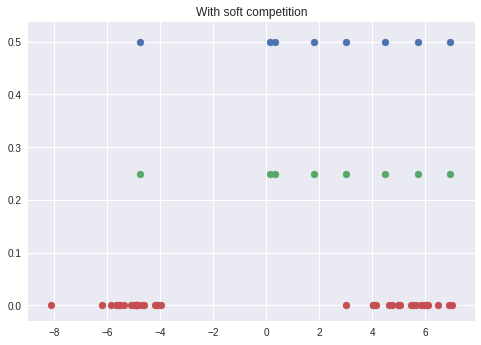

In [0]:
plt.scatter(centers, [0.5]*len(centers))
plt.scatter(centers, [0.25]*len(mu))
plt.scatter(sample_test, [0]*len(sample_test))
plt.title('With soft competition')
plt.show()

### Ballist and balltest

In [0]:
patterns_train=np.genfromtxt('/content/ballist.dat', dtype = None, delimiter = ',',encoding=None)
patterns_test=np.genfromtxt('/content/balltest.dat', dtype = None,  delimiter = ',',encoding=None)

OSError: ignored

In [0]:
X_train=np.zeros((np.shape(patterns_train)[0],2))
Y_train=np.zeros((np.shape(patterns_train)[0],2))
for i in range(np.shape(patterns_train)[0]):
  X_train[i,0]=patterns_train[i][:5]
  X_train[i,1]=patterns_train[i][6:12]
  Y_train[i,0]=patterns_train[i][12:17]
  Y_train[i,1]=patterns_train[i][18:]

In [0]:
X_test=np.zeros((np.shape(patterns_test)[0],2))
Y_test=np.zeros((np.shape(patterns_test)[0],2))
for i in range(np.shape(patterns_test)[0]):
  X_test[i,0]=patterns_test[i][:5]
  X_test[i,1]=patterns_test[i][6:12]
  Y_test[i,0]=patterns_test[i][12:17]
  Y_test[i,1]=patterns_test[i][18:]

In [0]:
weights, absolute_residual_error,centers,output,centers_init=LMS_withCL(X_train,X_test,12,Y_train,Y_test,1,0.2,10,100,0.01,0.2,0.5,hard=False,initial_radius=1.5)
print("The absolute residual error on the validation set equals ",absolute_residual_error)

The absolute residual error on the validation set equals  0.012452493999227938


In [0]:
centersX=[]
centersY=[]
for center in centers:
  centersX.append(center[0])
  centersY.append(center[1])

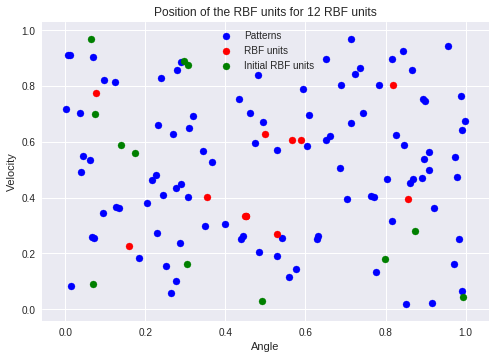

In [0]:
plt.scatter(X_train[:,0], X_train[:,1], color = "blue")
plt.scatter(centersX, centersY, color="red")
plt.scatter(centers_init[:,0],centers_init[:,1],color="green")
plt.legend(["Patterns","RBF units","Initial RBF units"])
plt.title("Position of the RBF units for 12 RBF units")
plt.xlabel("Angle")
plt.ylabel("Velocity")
plt.show()

The RBF units are pretty well placed but it seems that we still have a few dead units

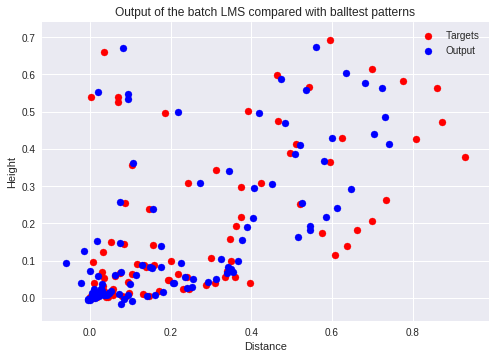

In [0]:
plt.scatter(Y_test[:,0],Y_test[:,1],color='red')
plt.scatter(output[:,0],output[:,1],color="blue")
plt.legend(['Targets','Output'])
plt.title('Output of the batch LMS compared with balltest patterns')
plt.xlabel("Distance")
plt.ylabel("Height")
plt.show()

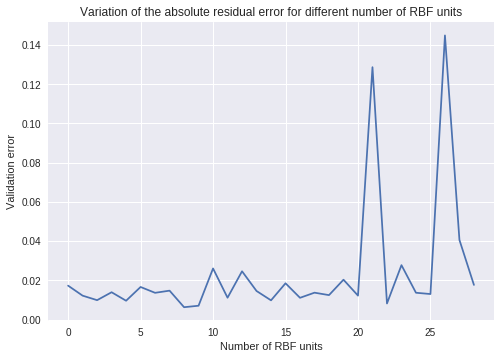

In [0]:
error_list=[]
sigma=1.5
for number_RBF in range (1,30):
  weights, absolute_residual_error,centers,output,centers_init=LMS_withCL(X_train,X_test,12,Y_train,Y_test,1,0.2,10,200,0.01,0.2,0.3,hard=False,initial_radius=2)
  error_list.append(absolute_residual_error)
plt.plot(error_list)
plt.xlabel("Number of RBF units")
plt.ylabel("Validation error")
plt.title("Variation of the absolute residual error for different number of RBF units")
plt.show()

We see that only 2 RBF units may be enough to have a small validation error

# Assignment - Part 2 

### 4.1 Topological Ordering of Animal Species

We're going to write the core algorithm to train the SOM network :

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

In [0]:
w = np.random.rand(100,84)
w.shape
animals = np.genfromtxt('animals.dat',delimiter =',')
len(animals)

f = open('animalnames.txt', "r")
animal_names = f.readlines()
f.close()

w = np.random.uniform(0,1,(100,84))
x = animals.reshape((32,84))
x.shape[1]

animal_names

["'antelop'\t\n",
 "'ape'\t\n",
 "'bat'\t\n",
 "'bear'\t\n",
 "'beetle'\t\n",
 "'butterfly'\t\n",
 "'camel'\t\n",
 "'cat'\t\n",
 "'crocodile'\t\n",
 "'dog'\t\n",
 "'dragonfly'\t\n",
 "'duck'\t\n",
 "'elephant'\t\n",
 "'frog'\t\n",
 "'giraffe'\t\n",
 "'grasshopper'\t\n",
 "'horse'\n",
 "'housefly'\n",
 "'hyena'\t\n",
 "'kangaroo'\t\n",
 "'lion'\t\n",
 "'moskito'\t\n",
 "'ostrich'\t\n",
 "'pelican'\t\n",
 "'penguin'\t\n",
 "'pig'\t\n",
 "'rabbit'\t\n",
 "'rat'\t\n",
 "'seaturtle'\t\n",
 "'skunk'\t\n",
 "'spider'\t\n",
 "'walrus'"]

In [0]:
def core_SOM(x, epochs,w):
  
  #Create random matrix  
  n_samples = x.shape[0]
  n_features = x.shape[1]
  n_nodes = w.shape[0]
  distance = np.zeros(n_nodes)
  
  for it in range (epochs):
    N_neighbours = int(50*(1-it/epochs))
    for i in range(n_samples):
      #Compute the minimum node
      for j in range(n_nodes):
        d = np.linalg.norm(x[i,:]-w[j,:])
        distance[j] = d
      winner = np.argmin(distance)
      #Compute the new boundary
      
      min_boundary = max(0,winner - N_neighbours)
      max_boundary = min(100, winner + N_neighbours)
      #Update weights
      
      for j in range(min_boundary, max_boundary):
        w[j] = w[j] + 0.2*(x[i]-w[j])
      
  return w

def SOM_test (x,w):
  
  #Function to test the SOM algorithm
  
  n = x.shape[0]
  indices = []
  n_samples = x.shape[0]
  n_features = x.shape[1]
  n_nodes = w.shape[0]
  distance = np.zeros(n_nodes)
  
  for i in range(n_samples):
      #Compute the minimum node
    for j in range(n_nodes):
        d = np.linalg.norm(x[i,:]-w[j,:])
        distance[j] = d
    winner = np.argmin(distance)
    indices.append(winner)
    
  return np.array(indices)
      

      
      
      
      

In [0]:
w = core_SOM(x,20,w)
w

res = SOM_test (x,w)
res

array([90, 63, 75, 51,  1,  1, 99, 67, 36, 59,  0, 18, 81, 29, 98,  0, 93,
        3, 54, 88, 67,  4, 22, 18, 25, 95, 85, 78, 34, 72,  9, 44])

In [0]:
Z = [x for _,x in sorted(zip(res,animal_names))]
np.transpose(Z)

array(["'dragonfly'\t\n", "'grasshopper'\t\n", "'beetle'\t\n",
       "'butterfly'\t\n", "'housefly'\n", "'moskito'\t\n", "'spider'\t\n",
       "'duck'\t\n", "'pelican'\t\n", "'ostrich'\t\n", "'penguin'\t\n",
       "'frog'\t\n", "'seaturtle'\t\n", "'crocodile'\t\n", "'walrus'",
       "'bear'\t\n", "'hyena'\t\n", "'dog'\t\n", "'ape'\t\n", "'cat'\t\n",
       "'lion'\t\n", "'skunk'\t\n", "'bat'\t\n", "'rat'\t\n",
       "'elephant'\t\n", "'rabbit'\t\n", "'kangaroo'\t\n",
       "'antelop'\t\n", "'horse'\n", "'pig'\t\n", "'giraffe'\t\n",
       "'camel'\t\n"], dtype='<U15')

### 4.2 Cyclic Tour

In [0]:

cities = np.genfromtxt('cities.dat',
                       dtype=None,
                       delimiter =',')
cities = cities[:,0:2]
len(cities)



w = np.random.uniform(0,1,(10,2))


In [0]:
def core_SOM(x, epochs,w):
  
  #Create random matrix  
  n_samples = x.shape[0]
  n_features = x.shape[1]
  n_nodes = w.shape[0]
  distance = np.zeros(n_nodes)
  
  for it in range (epochs):
    N_neighbours = (int) (4 * (1 - (1/epochs)*it ))
    for i in range(n_samples):
      #Compute the minimum node
      for j in range(n_nodes):
        d = np.linalg.norm(x[i,:]-w[j,:])
        distance[j] = d
      winner = np.argmin(distance)
      w[winner,:] += 0.2*(x[i,:] - w[winner,:])
      #Compute the new boundary
      
      for k in range(N_neighbours):
        min_boundary = (winner + k + 1)%10
        max_boundary = (winner - k - 1)%10
        w[min_boundary,:] += 0.3*( x[i,:]- w[min_boundary,:])
        w[min_boundary,:] += 0.3*(x[i,:] - w[min_boundary,:])
      
      
      #Update weights
      
      
    tmp = np.vstack([w[:,:],w[0,:]])
    plt.figure()
    plt.plot(tmp.T[0],tmp.T[1],color='blue', label = 'The tour')
    plt.scatter(cities.T[0],cities.T[1],color='red',label ='Training points')  
    plt.legend()
    plt.show()
      
      
  return w


      
      
      
      

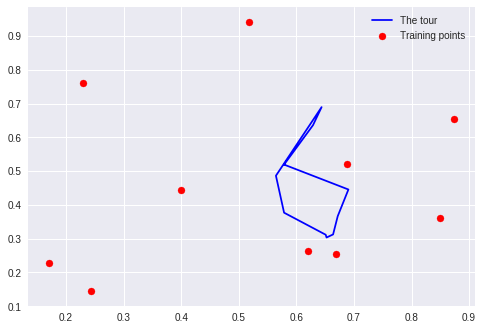

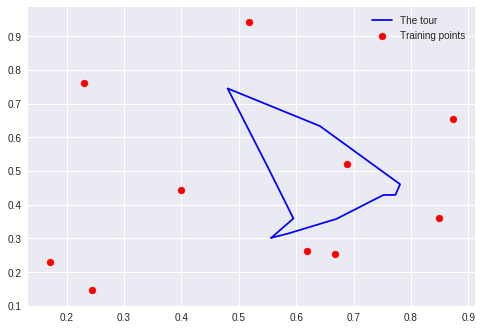

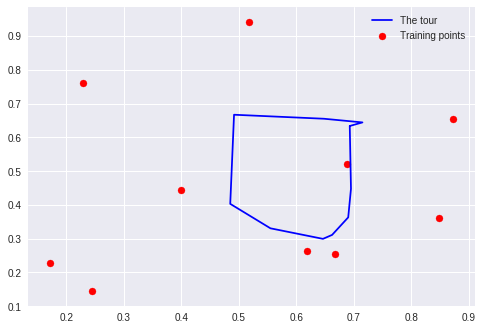

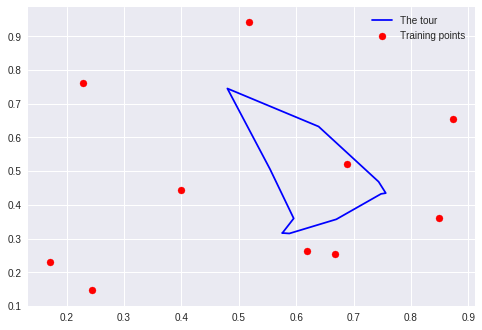

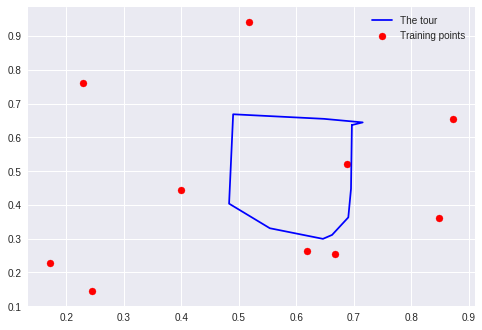

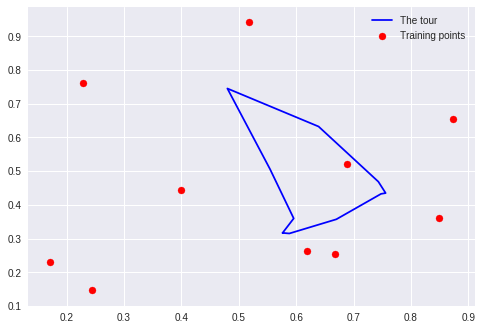

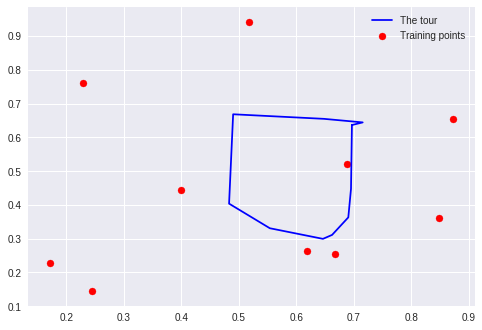

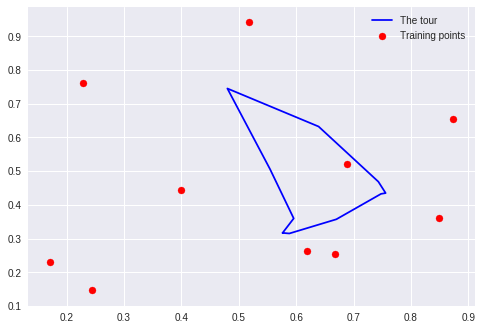

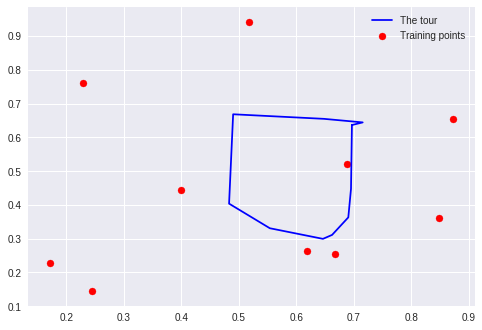

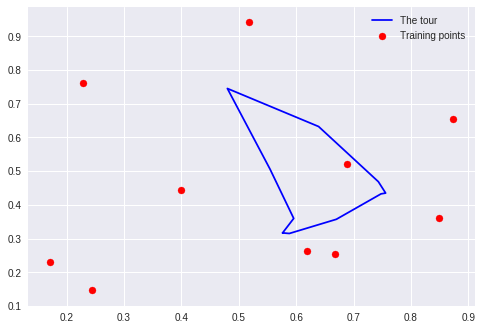

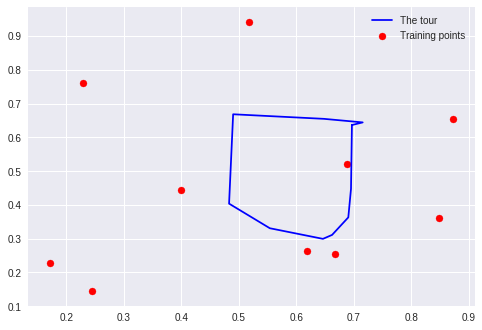

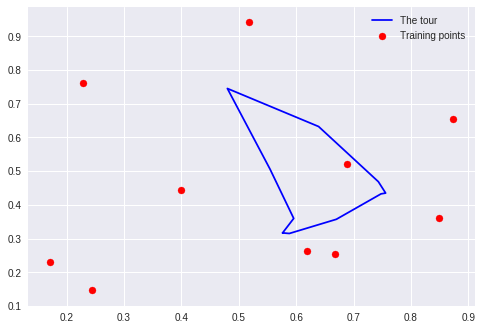

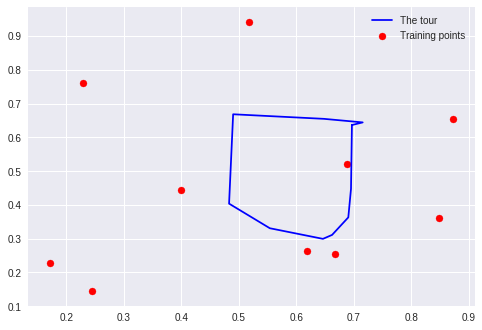

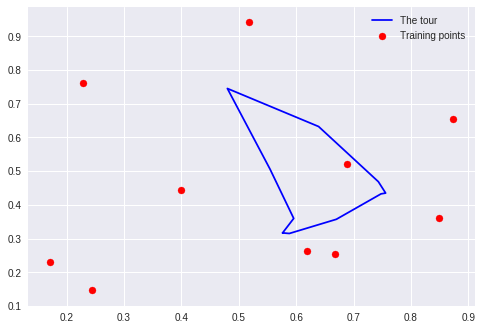

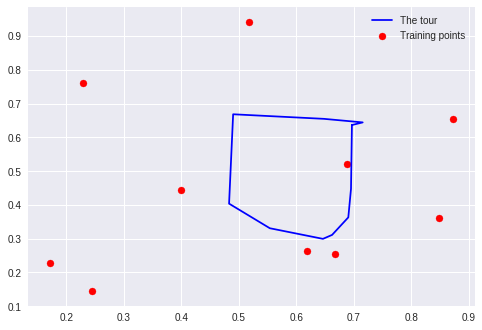

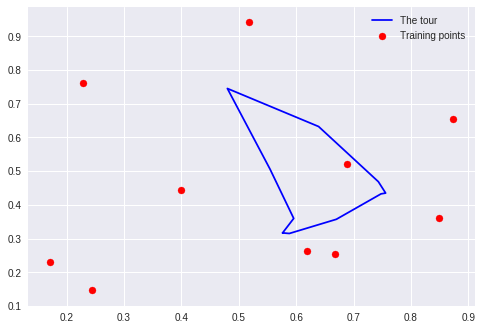

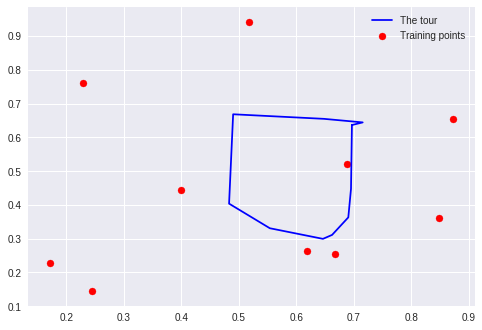

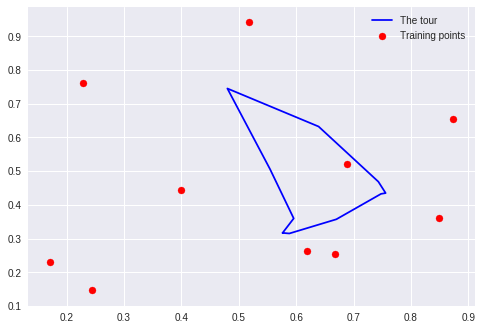

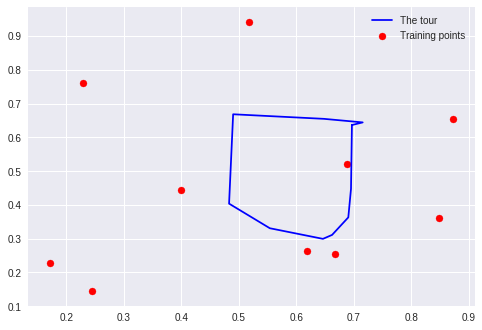

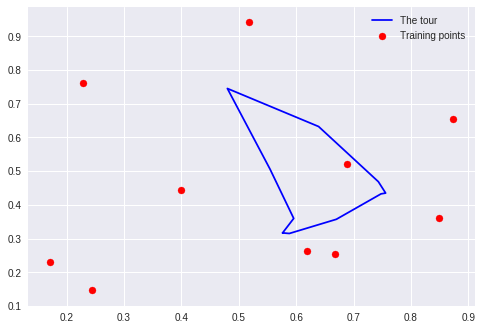

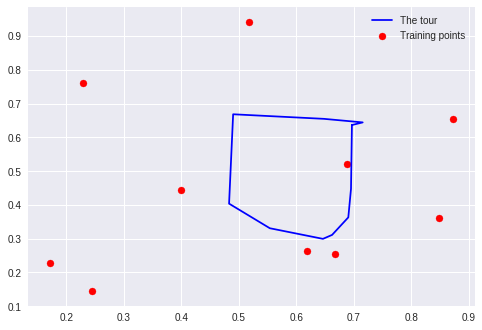

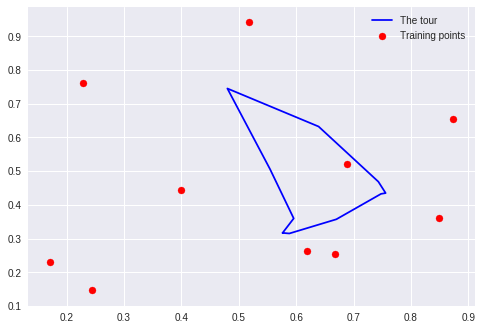

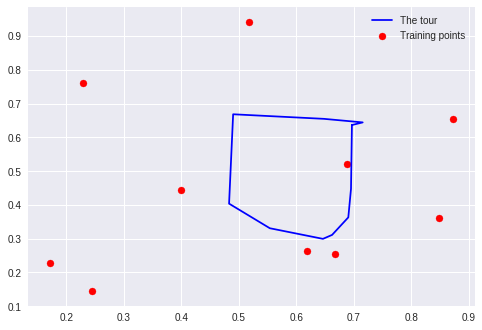

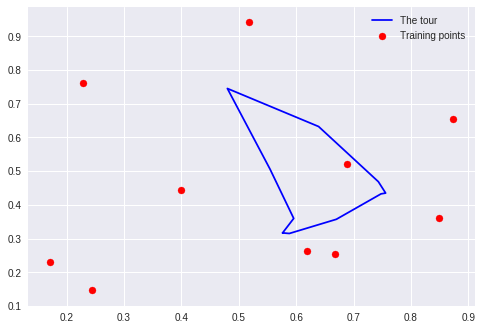

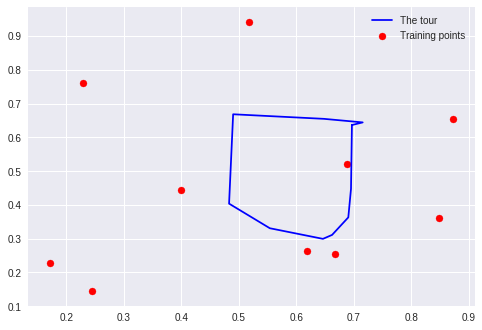

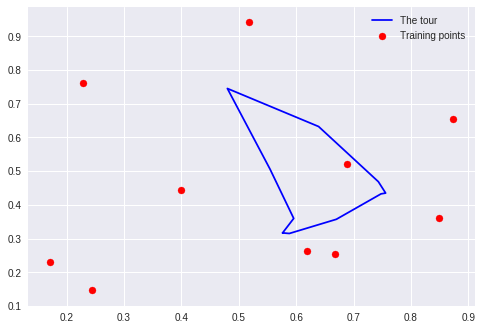

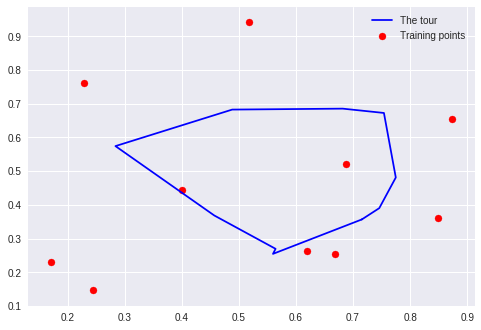

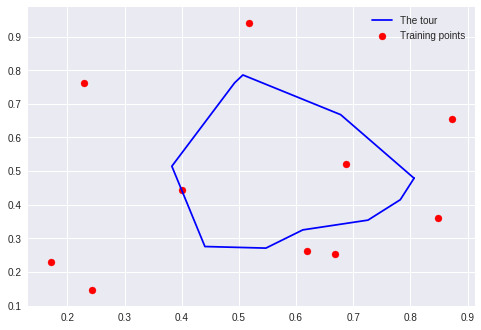

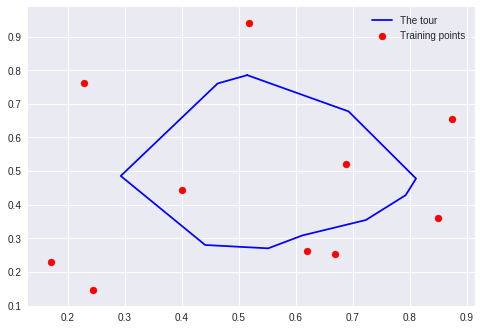

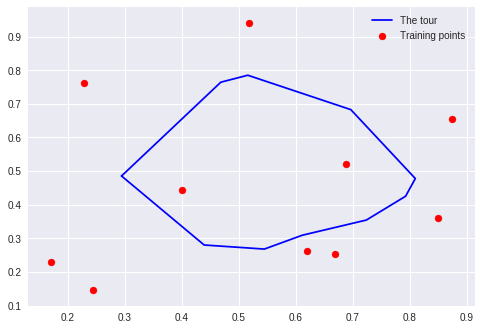

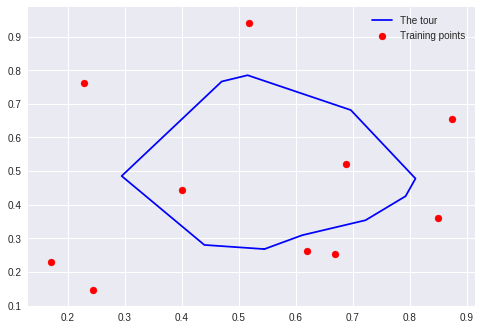

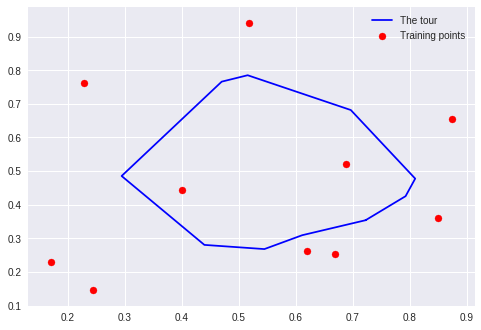

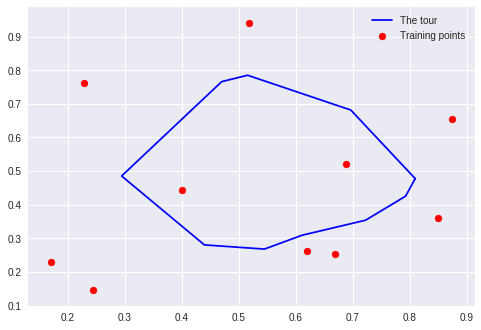

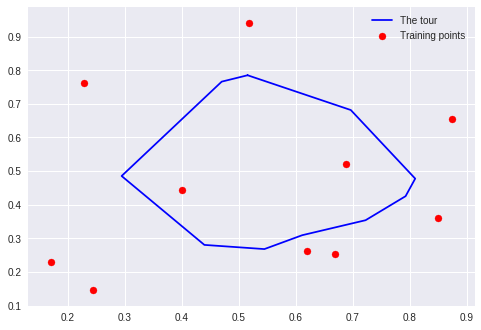

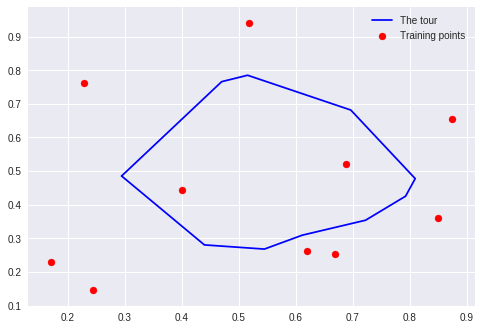

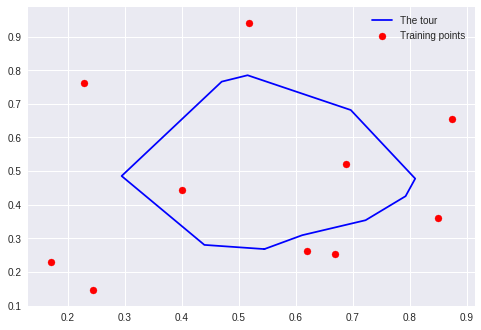

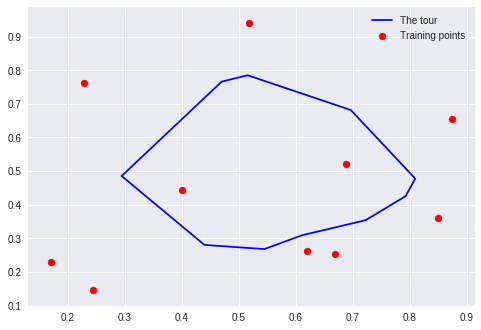

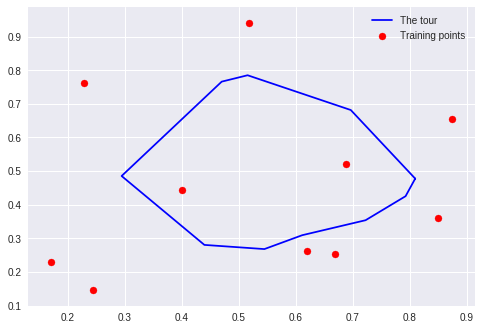

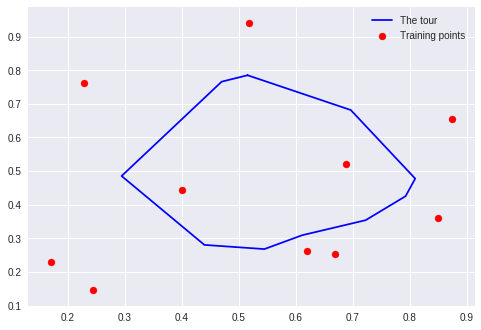

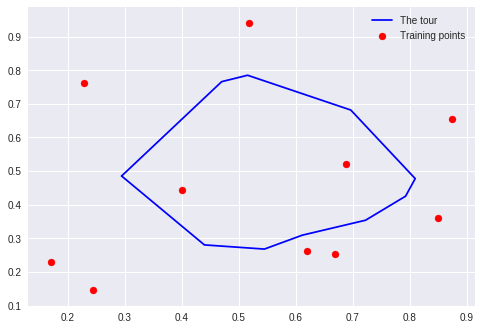

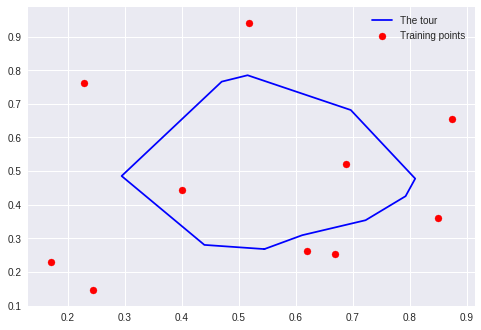

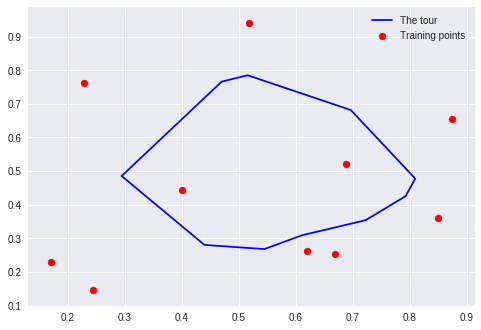

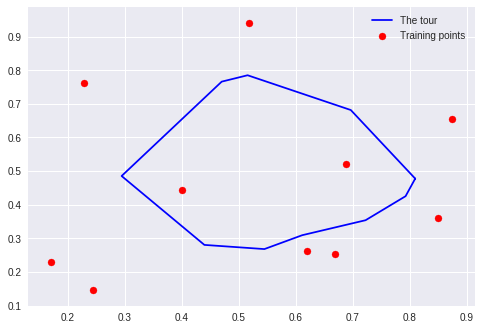

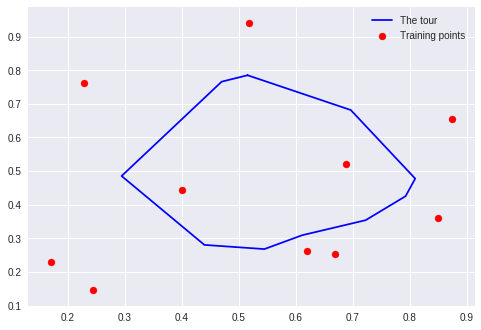

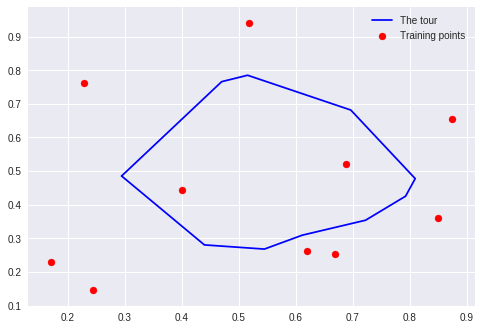

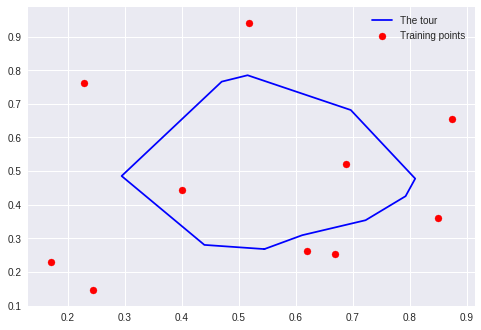

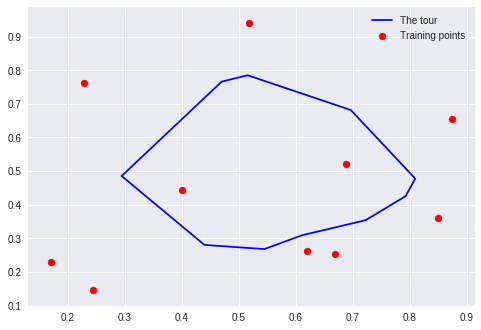

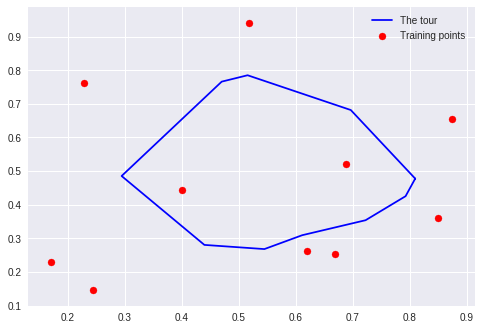

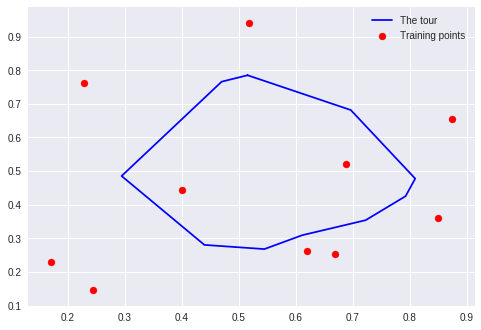

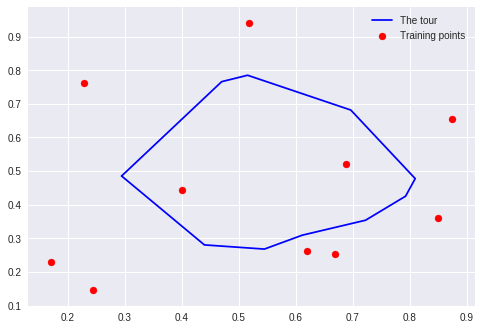

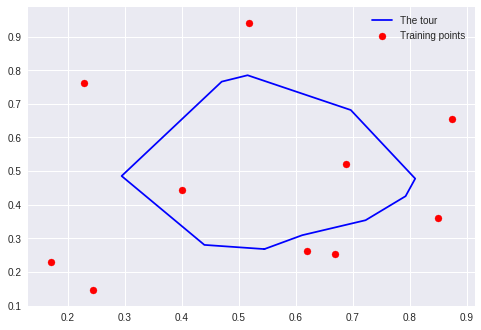

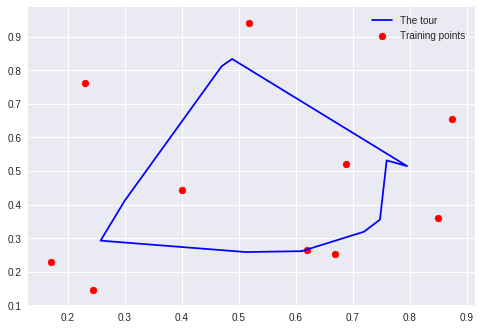

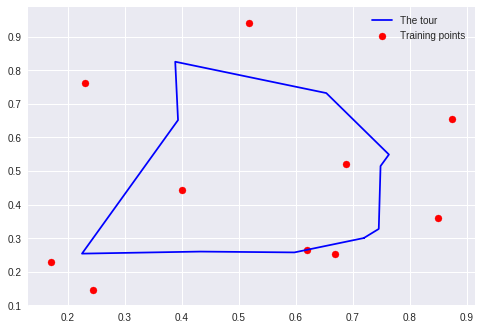

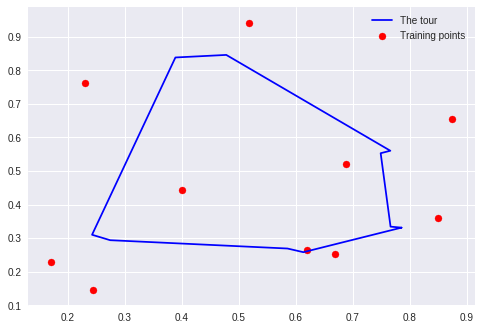

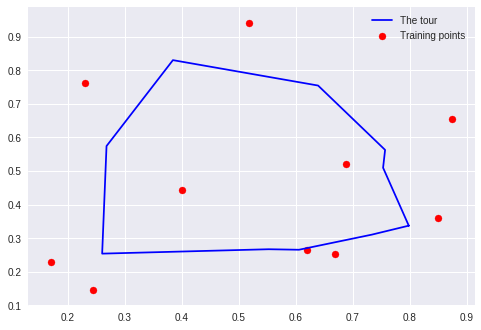

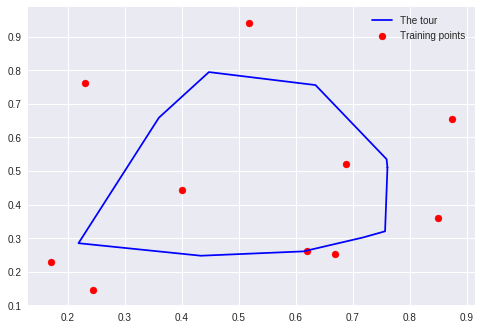

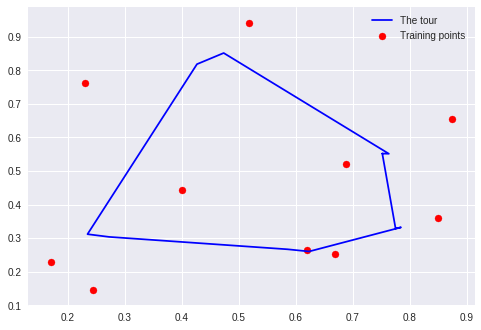

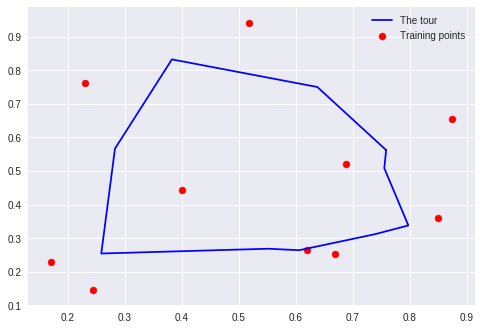

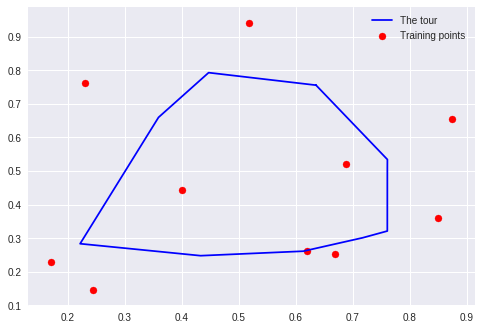

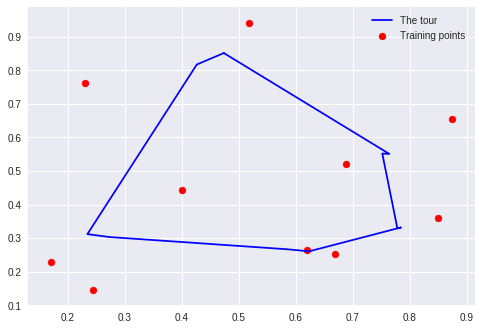

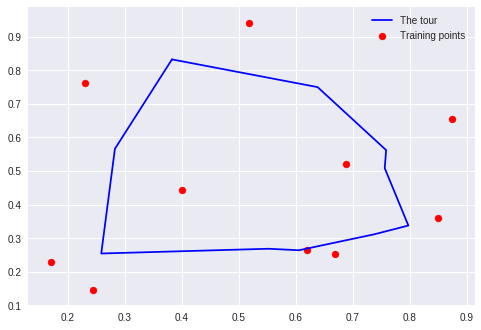

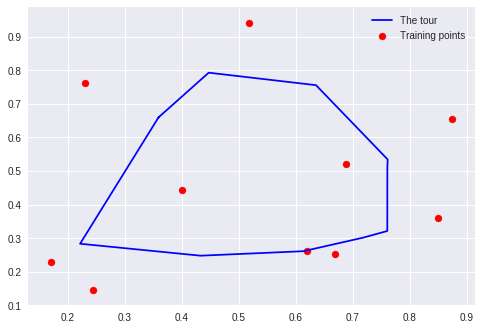

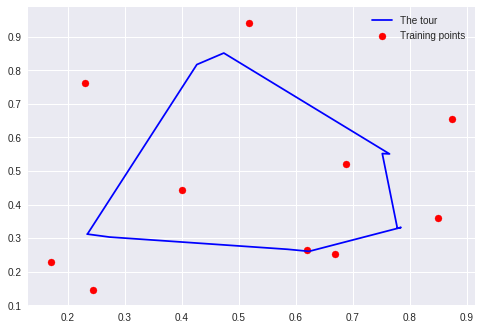

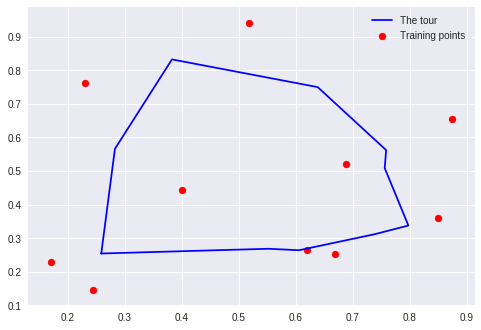

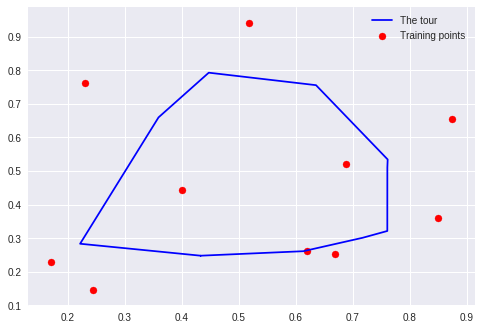

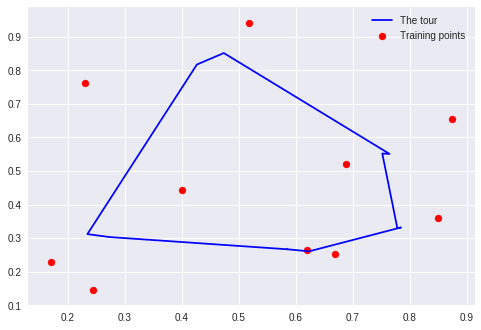

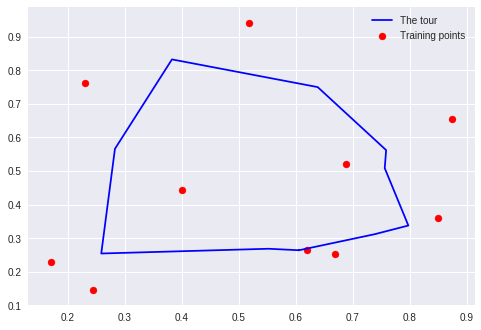

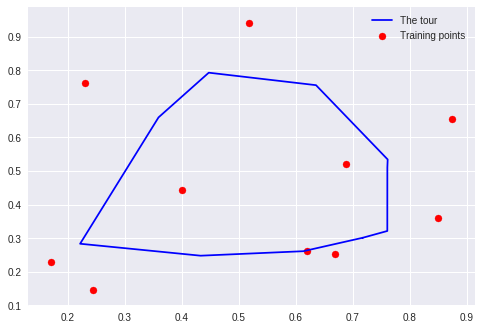

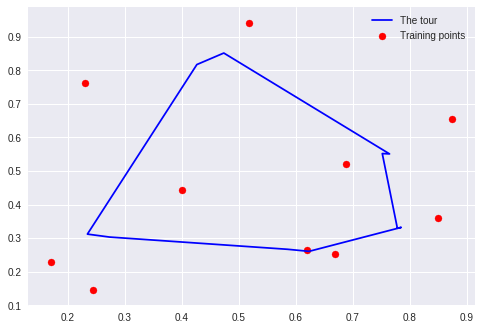

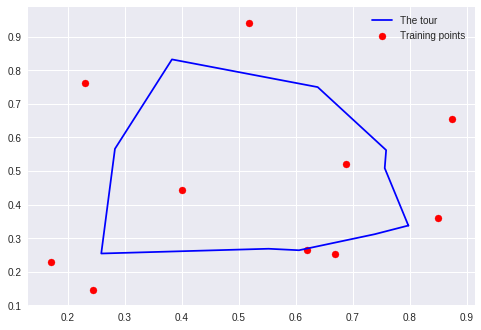

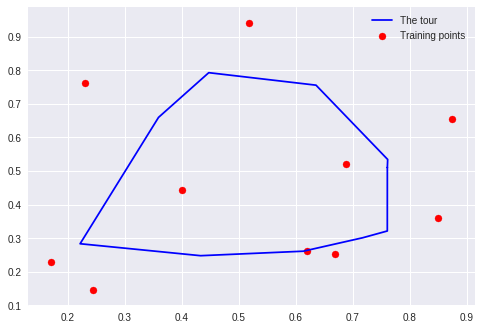

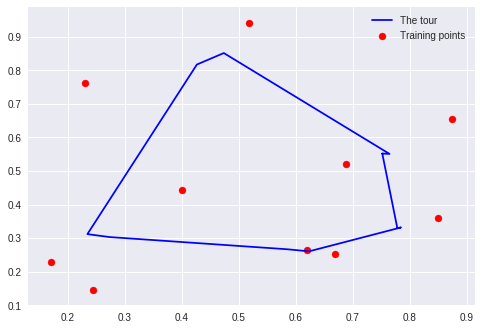

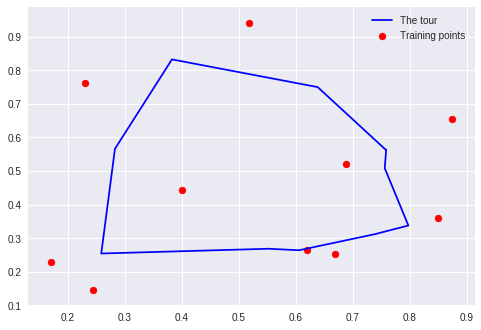

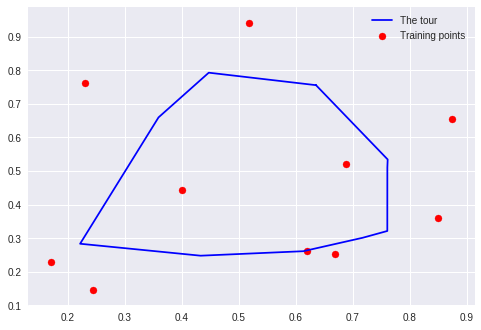

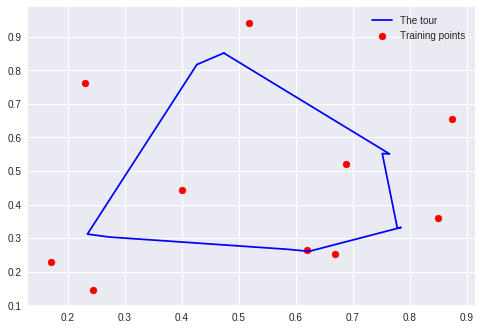

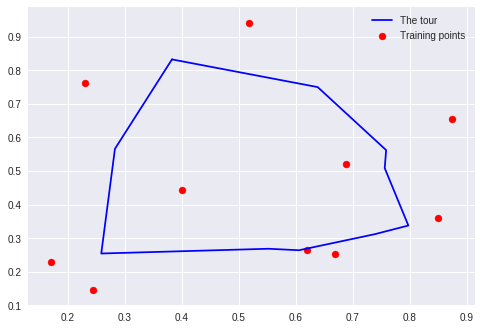

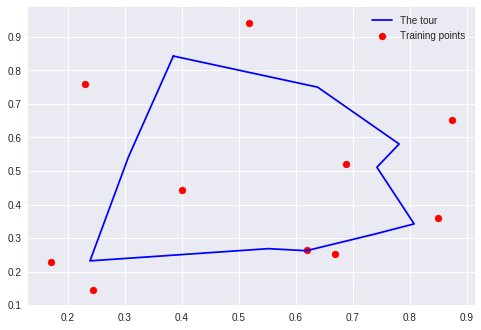

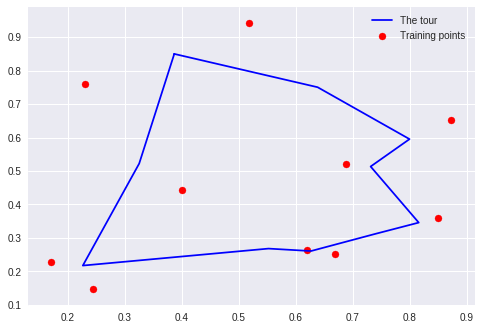

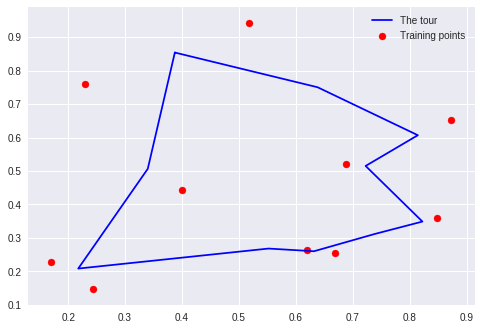

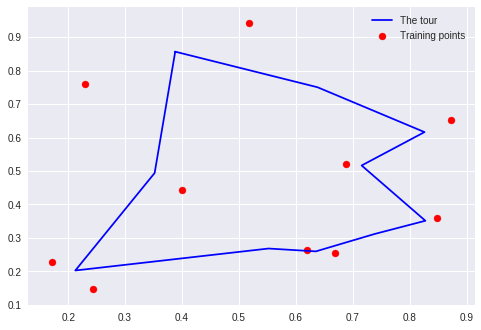

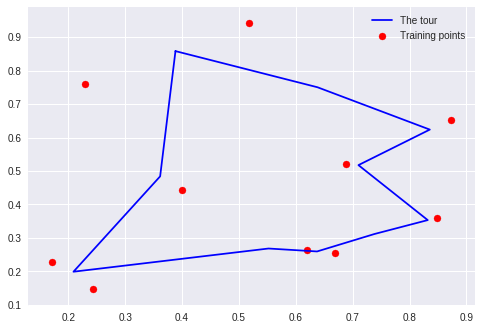

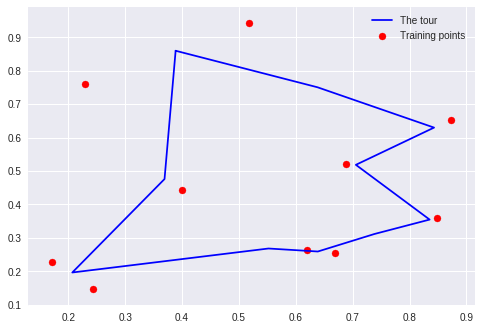

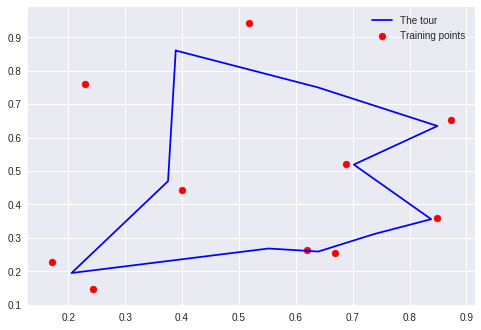

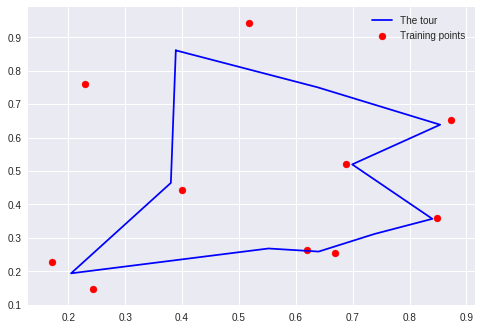

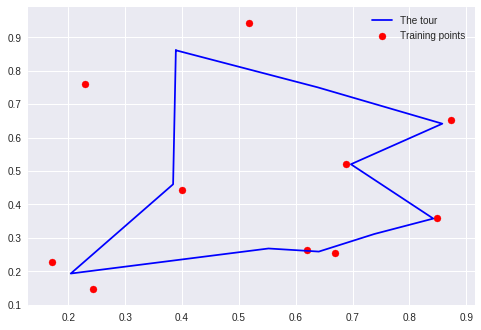

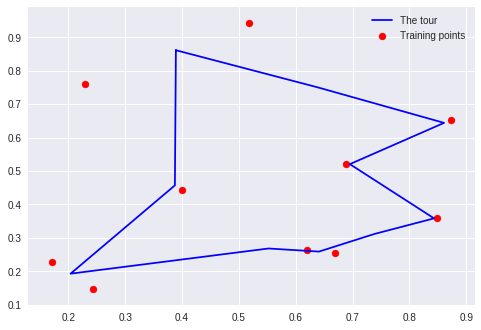

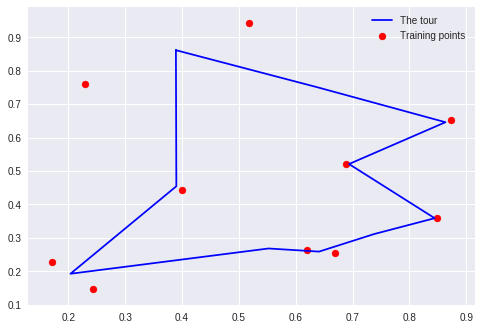

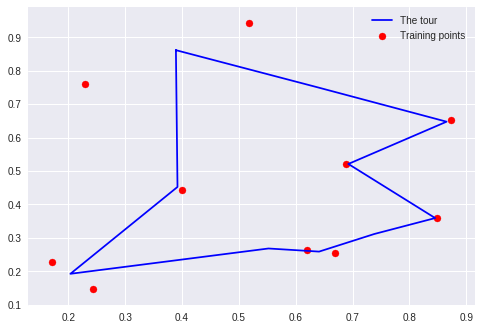

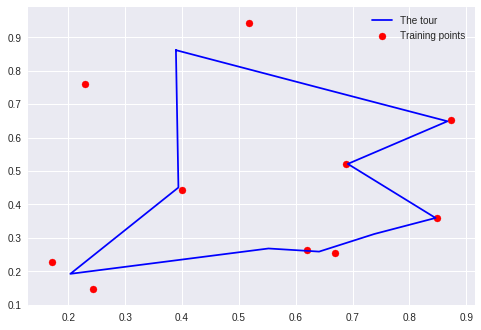

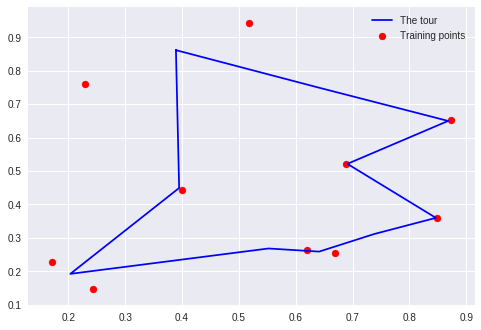

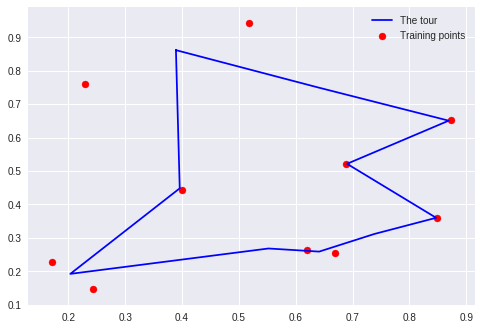

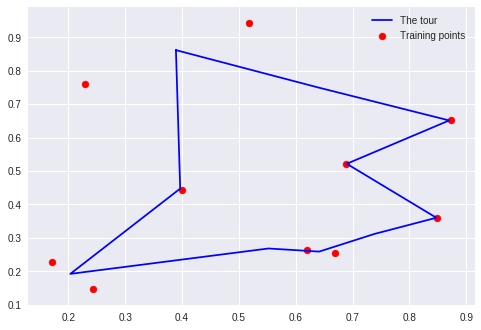

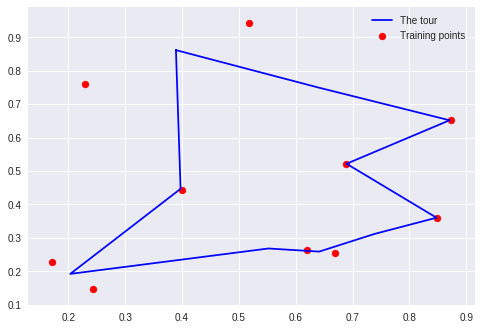

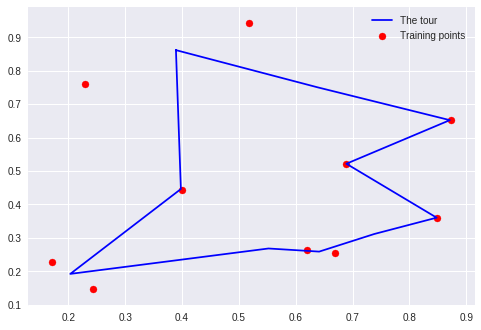

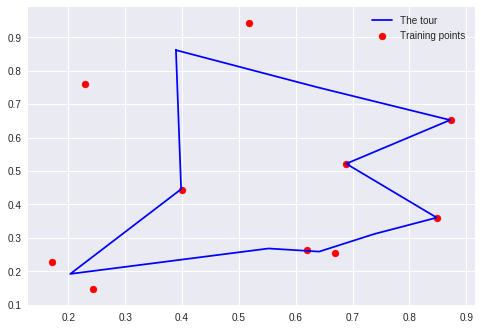

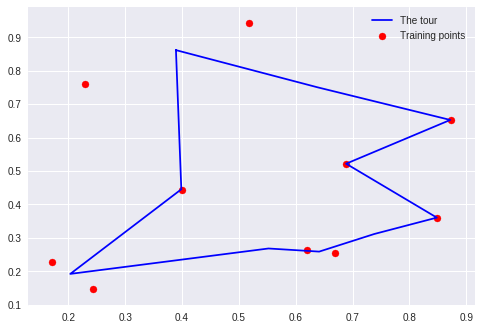

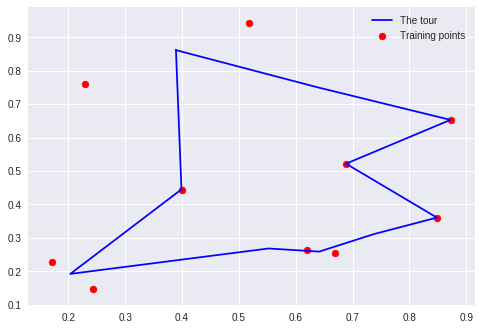

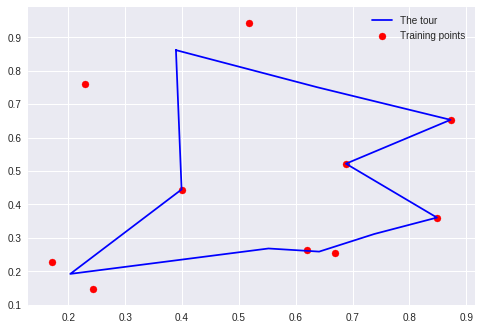

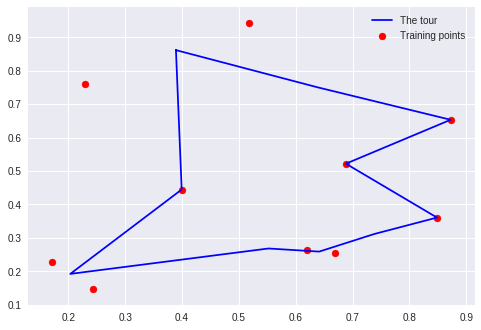

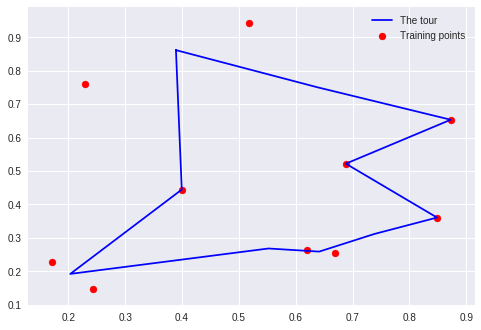

array([[0.38918874, 0.86122158],
       [0.63822782, 0.75010857],
       [0.87265728, 0.65316881],
       [0.6881211 , 0.52183718],
       [0.84855657, 0.3607899 ],
       [0.73821626, 0.31171254],
       [0.64118809, 0.25904455],
       [0.55201054, 0.26836017],
       [0.20323457, 0.19241249],
       [0.39944565, 0.4444775 ]])

In [0]:
core_SOM(cities,100,w)

The route changes every time you test the code. The tour try to pass by every points or in the middle of two points. It gives a good result in a little amount of time. The route does not seems optimum.


### 4.3 Data Clustering : Vote of MPs